In [1]:
from jl_color_8kbh import set_color
set_color("blue")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import numpy as np

In [3]:
df = pd.read_csv("attempt1.csv")

In [4]:
df.columns

Index(['doi', 'agent', 'model', 'instruction', 'prompt_tokens', 'propmpt_len',
       'completion_tokens', 'completion_len', 'formula', 'activity', 'syngony',
       'shape', 'length', 'length_mean', 'length_min', 'length_max', 'width',
       'width_mean', 'width_min', 'width_max', 'depth', 'depth_mean',
       'depth_min', 'depth_max', 'size', 'size_mean', 'size_min', 'size_max',
       'km', 'km_unif', 'vmax', 'vmax_unif', 'surface_area',
       'surface_area_unif', 'zeta_potential', 'zeta_potential_unif',
       'molar_mass', 'molar_mass_unif', 'c_min', 'c_min_unif', 'c_max',
       'c_max_unif', 'concentration_of_nanoparticles',
       'concentration_of_nanoparticles_unif', 'concentration_of_co_substrate',
       'concentration_of_co_substrate_unif', 'p_h', 'temperature',
       'chemicals_used_in_synthesis', 'polymer_used_in_synthesis',
       'surfactant', 'reaction_type'],
      dtype='object')

##### Уменьшение количества shape

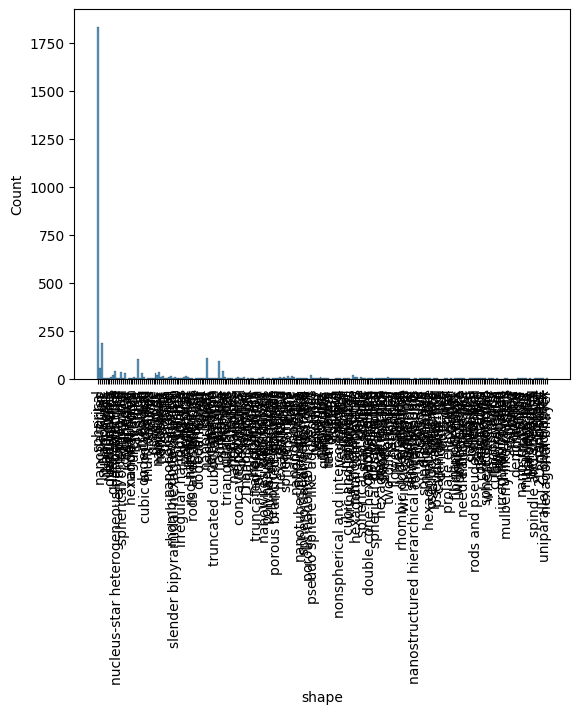

In [5]:
shapes = df["shape"].value_counts().index
sns.histplot(df["shape"])
plt.xticks(rotation=90);

###### Объединение похожих в один

In [6]:
shape_types = {
    'truncated cuboctahedron': 'polyhedral',
    'decahydron': 'polyhedral',
    'nanopolyhedra': 'polyhedral',
    'truncated octahedron': 'polyhedral',
    'icosahedral': 'polyhedral',
    'tetrahedral': 'polyhedral',
    'cuboctahedral': 'polyhedral',

    'hexahedrons': 'cubic',
    'cuboid': 'cubic',

    'lenticular': 'ellipsoidal',
    'Ovoid-like': 'ellipsoidal',
    'ovoid': 'ellipsoidal',

    'erythrocyte-like': 'plates',
    'saucer-like': 'plates',
    'circular': 'plates',

    'mulberry-like clusters': 'nanocluster',
    'pseudo sphere-like aggregates': 'nanocluster',
    'clusters': 'nanocluster',
    'trimer': 'nanocluster',
    'aggregated': 'nanocluster',

    'rod-like particles': 'rods',

    'gel': 'bulk',

    'nanocables': 'nanofiber',

    'nanotextiles': 'nanofiber',
    'fibrillar network': 'nanofiber',

    'nanotubes@nanoflowers': 'flower',

    'cachet-like': 'tile',
    'concave': 'tile',

    'column': 'block',

    'spherical or oval': 'spherical',
    'rounded': 'spherical',

    'porous nanohybrid network': 'nanohybrid',

    'colloidal': 'nanocomposite',

    'shell': 'cage',

    ########################
    
    'sheet-like': 'sheet',
    'nanosheets': 'sheet',
    'Nanosheets': 'sheet',
    'nanosheet': 'sheet',
    'sheets': 'sheet',
    'sheetlike': 'sheet',
    'sheet-shaped': 'sheet',
    '2D nanosheet': 'sheet',
    'two-dimensional': 'sheet',
    'Thinly layered': 'sheet',
    '2D nanosheet': 'sheet',

    'hexagonal nanoplates': 'plates',
    'nanoplates': 'plates',
    'plate-like': 'plates',
    'square': 'plates',
    'rectangular': 'plates',
    'triangular plates': 'plates',
    'nanotriangles': 'plates',
    'hexagonal plate-like': 'plates',
    'lamellar': 'sheet',
    'hexagonal bilayer': 'sheet',

    'urchin-like': 'branched',
    'coral-like': 'branched',
    'forest': 'branched',
    'besom-like': 'branched',
    'multipod': 'branched',
    'nanowires with thorns': 'branched',
    'quasi-coral': 'branched',
    'algae-like': 'branched',
    'cauliflower-like': 'branched',
    
    'flower-like': 'flower',
    'nanoflower': 'flower',
    'nanoflowers': 'flower',
    'flower-shaped': 'flower',
    'flowerlike': 'flower',
    'ball-flower': 'flower',
    'dandelion-like': 'flower',
    'nanostructured hierarchical flower blooms': 'flower',
    'dahlia-like': 'flower',
    'Nanoflowers': 'flower',

    'nanorods': 'rods',
    'nanowires': 'rods',
    'Nanowires': 'rods',
    'nanowire': 'rods',
    'rods/wires': 'rods',
    'rod': 'rods',
    'rod-like': 'rods',
    'short rod-like': 'rods',
    'hexagonal rod': 'rods',
    'hexagonal rod-like': 'rods',
    'rods and pseudo spherical': 'rods',
    'rods and spheroids': 'rods',

    'quasi-spherical': 'spherical',
    'pseudo spherical': 'spherical',
    'pseudo-spherical': 'spherical',
    'spherical or ellipsoidal': 'spherical',
    'spheroidal or ellipsoidal': 'spherical',
    'elliptical or sphere': 'spherical',
    'spherical-like': 'spherical',
    'sphere-shaped': 'spherical',
    'spherical or spheroidal': 'spherical',
    'spherical and spindle': 'spherical',
    'Nanospheres': 'spherical',
    'nanospheres': 'spherical',
    'Spherical': 'spherical',
    'spheroidal': 'spherical',
    'round': 'spherical',
    'globular': 'spherical',
    'semi-spherical': 'spherical',
    'near-cubic': 'cubic',

    'nanoflakes': 'flakes',
    'flakes': 'flakes',
    'flake': 'flakes',
    'flaky': 'flakes',
    'flake-like': 'flakes',
    'wrinkled flakes': 'flakes',
    
    'octahedron': 'octahedral',
    'octahedrons': 'octahedral',

    'nanotubes': 'tubular',
    'nanotube': 'tubular',
    'belt-like': 'tubular',
    'belt': 'tubular',
    'nanobelts': 'tubular',
    'nanobelt': 'tubular',
    'nanoribbons': 'tubular',
    'nanoribbon': 'tubular',
    'ribbons': 'tubular',

    'cube': 'cubic',
    'nanocubes': 'cubic',
    'nanocube': 'cubic',
    'cubes': 'cubic',
    'cubic or polyhedral': 'cubic',
    'cubic and polyhedral': 'cubic',
    'quasi-cubic': 'cubic',
    'concave-cubic': 'cubic',
    'cube-like': 'cubic',

    'polyhedral': 'polyhedral',
    'polyhedron-shaped': 'polyhedral',
    'concave polyhedral': 'polyhedral',
    
    'nanocomposite': 'nanocomposite',
    'nanocomposites': 'nanocomposite',
    
    'nanohybrid': 'nanohybrid',
    'nanohybrids': 'nanohybrid',

    'nanoclusters': 'nanocluster',
    'nanocluster': 'nanocluster',

    'nanofibers': 'nanofiber',
    'nanofiber': 'nanofiber',

    'nanostructures': 'nanostructure',
    'nanostructure': 'nanostructure',
    'nanostructured': 'nanostructure',

    'core-shell': 'core-shell',
    'core-satellite': 'core-shell',
    
    'disk': 'plates',
    'nanodisks': 'plates',

    'prisms': 'prism',
    'prism-shaped': 'prism',
    'hexagonal prism': 'prism',
    'double cone hexagonal prism': 'prism',
    'hexagonal': 'prism',
    'slender bipyramidal hexagonal prism': 'prism',
    'bipyramidal': 'prism',

    'dodecahedron': 'dodecahedral',
    'dodecahedral': 'dodecahedral',
    'rhombic dodecahedral': 'dodecahedral',
    'rhombic dodecahedron': 'dodecahedral',

    'nanodots': 'dots',
    'dots-like': 'dots',
    
    'quantum dots': 'dots',

    'monomer': 'dots',
    'discrete': 'dots',
    
    'chain-like': 'chain',
    'Cyclic': 'chain',
    'helical': 'chain',
    'clew-like': 'chain',
    'toroid': 'chain',
    'uniparallel G-quadruplex': 'chain',

    'block': 'block',
    'blocky': 'block',
    'blockish': 'block',

    'dendritic': 'dendritic',
    'dendrite-like': 'dendritic',
    'dendritic-like': 'dendritic',

    'needle-like': 'needle',
    'nanoneedles': 'needle',
    'needle bundle-like': 'needle',

    'spindle-shaped': 'spindle',
    'spindle': 'spindle',
    'fusiform': 'spindle',
    'spindle and spherical': 'spindle',
    'rice-like': 'spindle',

    'ellipsoidal': 'ellipsoidal',
    'prolate ellipsoidal': 'ellipsoidal',

    'grain-like': 'grain',
    
    'vesicles': 'vesicle',
    'vesicle-like': 'vesicle',
    'vesicular': 'vesicle',

    'nanocages': 'cage',
    'nanoballoons': 'cage',

    'angular': 'irregular',
    'irregular': 'irregular',
    'irregular bulk': 'irregular',
    'irregular nanoparticles': 'irregular',
    'irregular polygon': 'irregular',
    'multi-shaped': 'irregular',
    'anisotropic': 'irregular',
    'nonspherical and interconnected': 'irregular',
    'wrinkled structures': 'irregular',
    
    'multibranched': 'branched',
    'porous branched-structure': 'branched',

    'tubular': 'tubular',

    'star-shaped': 'star',
    'nanostar': 'star',
    'nucleus-star heterogeneous nanostructure': 'star',

    'tile-like': 'tile',
    
    'graphene-like': 'graphene',

    'wrinkle paper-like': 'flakes',
    
    'cigar-shaped': 'elongated',
    'dumbbell': 'elongated',
    'elongate': 'elongated',

    'needle bundle-like': 'needle',
    
    'wheat sheaf-like': 'flower',
    
    'bamboo-like': 'tubular',

    'porous': 'porous',
    'nanosponges': 'porous',
    
    'chain-like': 'chain',
    
    'bulk': 'bulk',
    'massive': 'bulk',

    'chain-like': 'chain',  # Removed duplicate under 'nanocluster'

    'bipyramidal': 'polyhedral',  # Changed from 'prism'

    'concave': 'irregular',  # Changed from 'tile'

    'column': 'elongated',  # Changed from 'block'

    'spherical or ellipsoidal': 'ellipsoidal',
    'spheroidal or ellipsoidal': 'ellipsoidal',
    'elliptical or sphere': 'ellipsoidal',

    'hexagonal': 'plates',  # Changed from 'prism'

    'wheat sheaf-like': 'branched',  # Changed from 'flower'

    'nanoparticles': 'nanostructure',
    'Nanowires': 'nanofiber',
    'nanocrystals': 'nanostructure',
    'Nanosheets': 'sheet',
    'Nanoflowers': 'flower',
    'single twin': 'nanostructure',
    'particles': 'nanostructure',
    '2D nanonetwork': 'nanostructure',
    '3D-network': 'nanostructure',
    'cylindrical': 'rods',
    'hexamer': 'nanocluster',
    'hierarchical': 'nanostructure',
    'nanodiamonds': 'nanostructure',
    'particles-like': 'nanostructure',

}

In [7]:
from collections import Counter

In [8]:
Counter(shape_types.values()).keys()

dict_keys(['polyhedral', 'cubic', 'ellipsoidal', 'plates', 'nanocluster', 'rods', 'bulk', 'nanofiber', 'flower', 'tile', 'irregular', 'elongated', 'spherical', 'nanohybrid', 'nanocomposite', 'cage', 'sheet', 'branched', 'flakes', 'octahedral', 'tubular', 'nanostructure', 'core-shell', 'prism', 'dodecahedral', 'dots', 'chain', 'block', 'dendritic', 'needle', 'spindle', 'grain', 'vesicle', 'star', 'graphene', 'porous'])

In [9]:
df['shape_unif'] = df['shape'].replace(shape_types)

In [10]:
df['shape_unif'].value_counts()

shape_unif
spherical        1896
sheet             304
cubic             223
rods              212
tubular            91
nanostructure      79
flower             74
plates             59
irregular          52
octahedral         52
flakes             51
branched           35
nanofiber          32
polyhedral         31
ellipsoidal        21
prism              21
nanocomposite      21
block              21
nanocluster        20
dodecahedral       20
dots               19
spindle            17
chain              16
nanohybrid         13
core-shell         12
needle             11
dendritic           9
elongated           9
vesicle             8
star                6
cage                6
tile                6
porous              5
bulk                5
grain               4
graphene            2
Name: count, dtype: int64

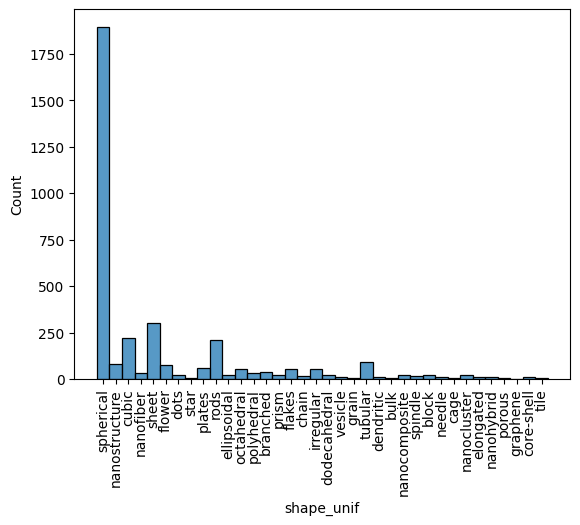

In [11]:
sns.histplot(df["shape_unif"])
plt.yscale = "log"
plt.xticks(rotation=90);

###### Удаление редких типов

In [11]:
df["shape_unif"].value_counts()[:20]

shape_unif
spherical        1896
sheet             304
cubic             223
rods              212
tubular            91
nanostructure      79
flower             74
plates             59
irregular          52
octahedral         52
flakes             51
branched           35
nanofiber          32
polyhedral         31
ellipsoidal        21
prism              21
nanocomposite      21
block              21
nanocluster        20
dodecahedral       20
Name: count, dtype: int64

In [12]:
shape_counts = df['shape_unif'].value_counts()
frequent_shapes = shape_counts[shape_counts >= 30].index.tolist()
frequent_shapes.remove('nanoparticles')
df['shape_unif'] = df['shape_unif'].where(df['shape_unif'].isin(frequent_shapes), None)

ValueError: list.remove(x): x not in list

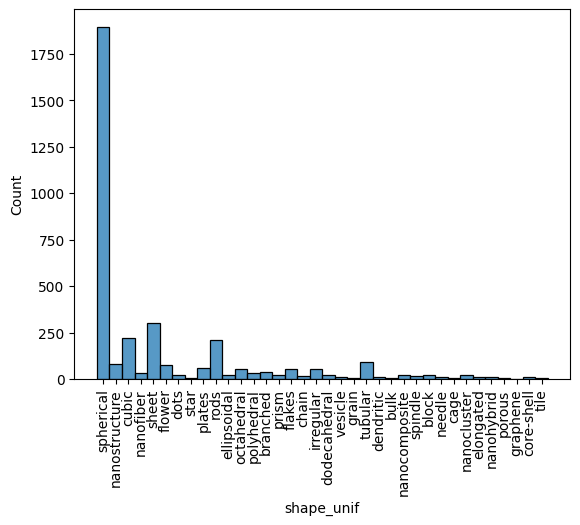

In [13]:
sns.histplot(df["shape_unif"])
plt.xticks(rotation=90);

##### Уменьшение количества activity

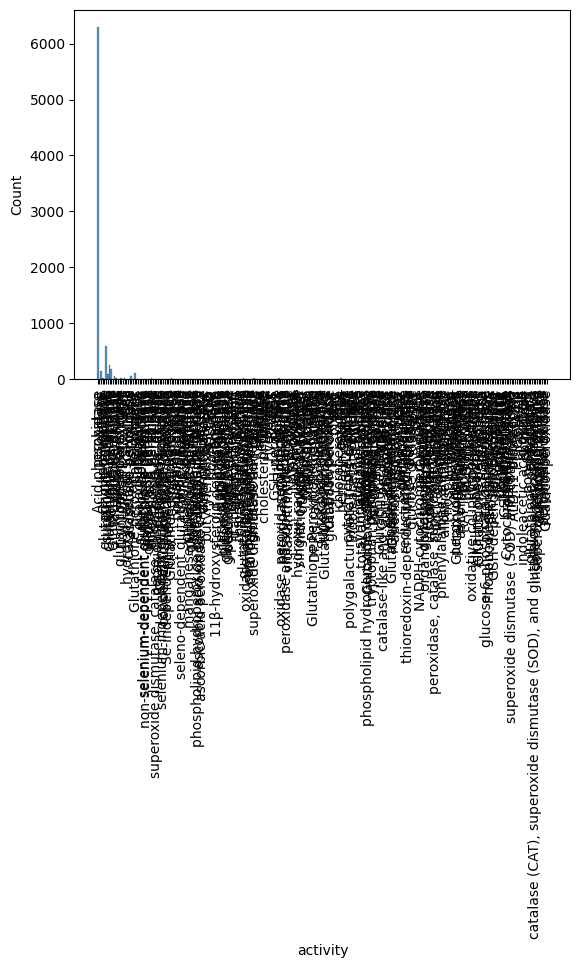

In [12]:
sns.histplot(df["activity"])
plt.xticks(rotation=90);

In [13]:
df["activity"].value_counts().index.to_numpy()

array(['peroxidase', 'glutathione peroxidase', 'catalase',
       'Glutathione peroxidase', 'oxidase', 'Peroxidase',
       'superoxide dismutase', 'ascorbate peroxidase',
       'Glutathione Peroxidase', 'laccase', 'phosphatase', 'SOD',
       'esterase', 'glutathione S-transferase', 'glucose oxidase',
       'IAA oxidase', 'glutathione reductase', 'lipoxygenase',
       'Glutathione peroxidase-like', 'manganese peroxidase', 'GPx',
       'polyphenol oxidase', 'MnP', 'ORR', 'RNA splicing',
       'guaiacol peroxidase', 'CO oxidation', 'polyphenoloxidase',
       'glutathione peroxidase-like', 'catalase-peroxidase',
       'oxidase and peroxidase',
       'phospholipid hydroperoxide glutathione peroxidase',
       'Mn2+ peroxidase', 'lignin peroxidase', 'thioredoxin peroxidase',
       'thiol peroxidase', 'lipase',
       'phospholipid hydroperoxide cysteine peroxidase', 'Fenton',
       'reduction of aryl azides', 'glutathione oxidase', 'catalase-like',
       'tryptophan peroxidase',

In [14]:
activity_map = {
    # Glutathione peroxidase and variants
    'glutathione peroxidase': 'glutathione peroxidase',
    'glutathione peroxidase-like': 'glutathione peroxidase',
    'glutathione peroxidase (gpx)': 'glutathione peroxidase',
    'glutathione peroxidase 1': 'glutathione peroxidase',
    'glutathione peroxidase-1': 'glutathione peroxidase',
    'glutathione peroxidase ii': 'glutathione peroxidase',
    'glutathione peroxidase mimetic': 'glutathione peroxidase',
    'gpx': 'glutathione peroxidase',
    'gpx-1': 'glutathione peroxidase',
    'gsh-px': 'glutathione peroxidase',
    'gsh peroxidase': 'glutathione peroxidase',
    'non-se gsh-px': 'glutathione peroxidase',
    'seleno-dependent glutathione peroxidase': 'glutathione peroxidase',
    'selenium-dependent glutathione peroxidase': 'glutathione peroxidase',
    'selenium-independent glutathione peroxidase': 'glutathione peroxidase',
    'se-independent glutathione peroxidase': 'glutathione peroxidase',
    'glutathion peroxidase': 'glutathione peroxidase',
    'glutathione peroxidase-like': 'glutathione peroxidase',

    # Catalase
    'catalase': 'catalase',
    'catalase-like': 'catalase',
    'catalase and laccase': 'catalase',
    'catalase/peroxidase': 'catalase',
    'cat': 'catalase',

    # Superoxide dismutase
    'superoxide dismutase': 'superoxide dismutase',
    'superoxide dismutase-like': 'superoxide dismutase',
    'manganese superoxide dismutase': 'superoxide dismutase',
    'sod': 'superoxide dismutase',
    'sod and cat': 'superoxide dismutase',
    'sod/pod': 'superoxide dismutase',
    'copper-zinc superoxide dismutase': 'superoxide dismutase',

    # Peroxidase
    'peroxidase': 'peroxidase',
    'peroxidase-like': 'peroxidase',
    'peroxidase-oxidase': 'peroxidase',
    'catalase-peroxidase': 'peroxidase',
    'guaiacol peroxidase': 'peroxidase',
    'guaiacol peroxidase': 'peroxidase',
    'peroxidase/oxidase': 'peroxidase',
    'hydroxyl radical scavenger': 'peroxidase',
    'mn2+ peroxidase': 'peroxidase',
    'manganese peroxidase': 'peroxidase',
    'mn peroxidase': 'peroxidase',
    'iodide peroxidase': 'peroxidase',
    'tryptophan peroxidase': 'peroxidase',
    'fenton': 'peroxidase',
    'peroxygenase': 'peroxidase',
    'ascorbate peroxidase': 'peroxidase',
    'ascorbic acid peroxidase (apod)-like activity': 'peroxidase',
    'ascorbic acid oxidase (aao)-like activity': 'peroxidase',
    'chlorogenic acid peroxidase': 'peroxidase',
    'dopa peroxidase': 'peroxidase',
    'chloroperoxidase': 'peroxidase',
    'ferulic acid peroxidase': 'peroxidase',
    'glucose peroxidase': 'peroxidase',
    'glutathione-dependent peroxidase': 'peroxidase',
    'iodide-peroxidase': 'peroxidase',
    'lignin peroxidase': 'peroxidase',
    'myeloperoxidase': 'peroxidase',
    'nadh peroxidase': 'peroxidase',
    'pod': 'peroxidase',
    'pod-like': 'peroxidase',
    'hrp': 'peroxidase',
    'hrp-like': 'peroxidase',
    'guaiacol oxidase': 'peroxidase',
    'phenoloxidase': 'peroxidase',
    'polyphenoloxidase': 'peroxidase',
    'polyphenol oxidase': 'peroxidase',
    'glucose oxidase': 'peroxidase',
    'glucose oxidase-like': 'peroxidase',

    # Oxidase
    'oxidase': 'oxidase',
    'oxidase-like and peroxidase-like': 'oxidase',
    'ascorbic acid oxidase': 'oxidase',
    'ascorbate oxidase': 'oxidase',
    'cholesterol oxidase': 'oxidase',
    'diamine oxidase': 'oxidase',
    'ethanol oxidase': 'oxidase',
    'monooxidase': 'oxidase',
    'nadh oxidase': 'oxidase',
    'nadph oxidase': 'oxidase',
    'oxidative coupling of methane': 'oxidase',
    'oxidase, peroxidase, and catalase': 'oxidase',
    'oxalate oxidase': 'oxidase',
    'chromogen oxidase': 'oxidase',
    'cytochrome c oxidase': 'oxidase',
    'cco': 'oxidase',
    'cco-like': 'oxidase',

    # Glutathione S-transferase
    'glutathione s-transferase': 'glutathione s-transferase',
    'gst': 'glutathione s-transferase',
    'gsh-s-transferase': 'glutathione s-transferase',
    'gsta4-4': 'glutathione s-transferase',

    # Glutathione reductase
    'glutathione reductase': 'glutathione reductase',
    'gsh reductase': 'glutathione reductase',
    'glutathione transferase': 'glutathione reductase',

    # Misc common
    'rna splicing': 'rna splicing',
    'rnase': 'rnase',
    'dnase': 'dnase',
    'dnase i': 'dnase',
    'lipase': 'lipase',
    'protease': 'protease',
    'proteolytic': 'protease',
    'peptidase': 'protease',
    'amidase': 'amidase',
    'esterase': 'esterase',
    'photooxidase': 'oxidase',
    'reductase': 'reductase',
    'thioredoxin': 'thioredoxin',
    'thioredoxin reductase': 'thioredoxin reductase',
    'thioredoxin peroxidase': 'thioredoxin peroxidase',
    'thiol peroxidase': 'thioredoxin peroxidase',
    'thioredoxin-dependent thiol peroxidase': 'thioredoxin peroxidase',

    # Catch-all
    'unknown': 'unknown',
    'non-peroxidase': 'unknown',
    'hydrolysis': 'hydrolase',
    'hydrolase': 'hydrolase',
    'phosphatase': 'phosphatase',
    'acid phosphatase': 'phosphatase',
    'alkaline phosphatase': 'phosphatase',
    'alkaline phosphatase-like': 'phosphatase',
    'phosphotriesterase': 'phosphatase',
    'phosphotriesterase-like': 'phosphatase',
    'phospholipid hydroperoxide glutathione peroxidase': 'glutathione peroxidase',
    'phospholipid hydroperoxide cysteine peroxidase': 'glutathione peroxidase',
    'phosphodiester bond cleavage': 'phosphodiesterase',
    'phosphodiesterase': 'phosphodiesterase',
}

activity_map.update({
    # Extensions and Additions

    # Already Existing Classes
    'glutathione-peroxidase': 'glutathione peroxidase',
    'glutathione peroxidase-4': 'glutathione peroxidase',
    'phgpx': 'glutathione peroxidase',
    'gsh-dependent peroxidase': 'glutathione peroxidase',
    'gsh-peroxidase': 'glutathione peroxidase',
    'catalase-like and gsh peroxidase-like': 'glutathione peroxidase',
    'non-se-gpx': 'glutathione peroxidase',
    'glutathione peroxidase (gpx)-like': 'glutathione peroxidase',
    'non-selenium-dependent glutathione peroxidase': 'glutathione peroxidase',

    'peroxidase, oxidase': 'peroxidase',
    'peroxidase, catalase, superoxide dismutase': 'peroxidase',
    'catalase and peroxidase': 'peroxidase',
    'peroxidase and superoxide dismutase': 'peroxidase',
    'oxidase and peroxidase': 'oxidase',
    'peroxidase, catalase, oxidase': 'oxidase',

    'superoxide dismutase, catalase, glutathione peroxidase': 'superoxide dismutase',
    'superoxide dismutase and catalase': 'superoxide dismutase',
    'superoxide dismutase (sod) and catalase (cat)': 'superoxide dismutase',

    'cuzn-sod': 'superoxide dismutase',
    'mnp': 'peroxidase',  # manganese peroxidase (mnp)

    'gox-like': 'oxidase',  # glucose oxidase-like

    'thiocyanate oxidation': 'oxidase',
    'indole-3-acetic acid oxidase': 'oxidase',
    'indoleacetic acid oxidase': 'oxidase',
    'auxin oxidase': 'oxidase',
    'iaa oxidase': 'oxidase',
    'iaa-oxidase': 'oxidase',
    'pseudo-nad(p)h oxidase': 'oxidase',
    'nadh-oxidase': 'oxidase',
    'nadph peroxidase': 'peroxidase',
    'polyamine oxidase': 'oxidase',
    'cytochrome c-oxidase': 'oxidase',
    'prx': 'peroxidase',
    'lipid peroxidase': 'peroxidase',

    'photooxidase': 'oxidase',
    'photocatalytic': 'oxidase',

    'peroxynitrite scavenger': 'peroxidase',
    'peroxynitrite reductase': 'reductase',

    'chlorination': 'oxidase',
    'iodination': 'oxidase',
    'iodinating': 'oxidase',
    'haloperoxidase': 'oxidase',

    'co2 reduction': 'reductase',
    'co oxidation': 'oxidase',
    'reduction of aryl azides': 'reductase',
    'thioredoxin-dependent thiol peroxidase': 'thioredoxin peroxidase',

    'ethene-forming enzyme': 'oxidase',  # assuming 'ethylene-forming enzyme' activity

    # Hydrolytic enzymes
    'hydrolytic': 'hydrolase',
    'acetal hydrolysis': 'hydrolase',
    'cellulase': 'hydrolase',
    'invertase': 'hydrolase',
    'β-glucosidase': 'hydrolase',
    'β-glucuronidase': 'hydrolase',
    'amylase': 'hydrolase',
    'beta-amylase': 'hydrolase',

    # Dehydrogenases
    'dehydrogenase': 'dehydrogenase',
    'glucose dehydrogenase': 'dehydrogenase',
    'glucose-6-phosphate dehydrogenase': 'dehydrogenase',
    '11β-hydroxysteroid dehydrogenase': 'dehydrogenase',

    # Misc classes
    'aldh3': 'aldehyde dehydrogenase',
    'aldh1 plus aldh2': 'aldehyde dehydrogenase',
    'adenyl cyclase': 'cyclase',
    'atpase': 'atpase',
    'ribonuclease': 'rnase',
    'nuclease': 'rnase',
    'polymerase': 'polymerase',
    'raft polymerization': 'polymerase',
    'organophosphorus hydrolase': 'hydrolase',
    'chlorophyllase': 'hydrolase',
    'lipoxygenase': 'oxidase',
    'monooxygenase': 'oxidase',
    'violaxanthin de-epoxidase': 'oxidase',
    'p-450 complex': 'oxidase',  # Cytochrome P450
    'epoxidase': 'oxidase',
    'epoxidation': 'oxidase',

    # Radical scavenging and antioxidant classes
    'dpph radical scavenging': 'antioxidant',
    'hydroxyl radical scavenging': 'antioxidant',
    'nitric oxide scavenger': 'antioxidant',
    'singlet oxygen scavenger': 'antioxidant',
    'antioxidase': 'antioxidant',
    'total antioxidant capacity': 'antioxidant',

    # Proteases and related
    'chymotrypsin-like': 'protease',
    'collagenase': 'protease',
    'lysozyme': 'protease',
    'protease': 'protease',

    # Other hydrolases
    'amidase': 'amidase',
    'esterase': 'esterase',
    'phosphorylase': 'phosphorylase',
    'transphosphorylation': 'phosphorylase',

    # Miscellaneous
    'diene conjugates': 'oxidative stress marker',
    'malondialdehyde': 'oxidative stress marker',
    'ar': 'reductase',  # assuming aldose reductase
    'orr': 'oxidase',  # oxygen reduction reaction
    'thioredoxin': 'thioredoxin',
    'gr': 'glutathione reductase',
    'nadph-cytochrome c reductase': 'reductase',
    'cytochrome c reductase': 'reductase',
    'glutathione oxidase': 'oxidase',
    'c-gpx': 'glutathione peroxidase',
    'cgpx': 'glutathione peroxidase',
    'antimicrobial': 'antimicrobial',
    'po': 'peroxidase',
    'phenylalanine ammonia-lyase': 'lyase',
    'pal': 'lyase',
    'ppo': 'oxidase',  # polyphenol oxidase
    'polyphenolase': 'oxidase',
    'laccase': 'laccase',
    'syringaldazine oxidase': 'oxidase',
    'auxin oxidase': 'oxidase',
    'hydroxyl radical scavenger': 'antioxidant',
    'peroxide genesis': 'oxidase',
    'oph-like': 'hydrolase',  # organophosphorus hydrolase-like
    'uricase': 'oxidase',
})

activity_map.update({
    'superoxide peroxidase': 'peroxidase',
    'adenosine deaminase': 'deaminase',
    'hematin catalysis': 'catalysis',
    'indoleacetate oxidase': 'oxidase',
    'ethylene-forming enzyme': 'ethylene forming enzyme',
    'glutathione': 'glutathione',
    'butyrylcholinesterase': 'esterase',
    'olefin metathesis': 'metathesis',
    'quinol peroxidase': 'peroxidase',
    'nitroreductase': 'reductase',
    'catalase (cat), superoxide dismutase (sod), and glutathione peroxidase (gpx)': 'multiple antioxidant enzymes',
    'tryptophan peroxidase-oxidase': 'oxidase',
    'polygalacturonate trans-eliminase': 'lyase',
    'deiodinase': 'deiodinase',
    'coniferyl alcohol peroxidase': 'peroxidase',
    'paraoxonase': 'hydrolase',
    'dmop oxidation': 'oxidation',
    'cat-like': 'catalase',
    'mn(ii) oxidation': 'oxidation',
    'β-1,3 glucanase': 'glucanase',
    'monophenolase': 'oxidase',
    'tyrosinase': 'oxidase',
    'gamma-glutamyltransferase': 'transferase',
    'nadh-pod': 'peroxidase',
    'glutamine synthetase': 'synthetase',
    'chitinase': 'chitinase',
})

In [15]:
df['activity']

0                   peroxidase
1                   peroxidase
2                   peroxidase
3                   peroxidase
4                   peroxidase
                 ...          
9040                peroxidase
9041                peroxidase
9042                peroxidase
9043                peroxidase
9044    glutathione peroxidase
Name: activity, Length: 9045, dtype: object

In [16]:
print(set([a.lower() for a in df[~df['activity'].isna()]['activity'] if a.lower() not in activity_map]))

set()


In [17]:
df['activity'] = df['activity'].str.strip().str.lower()
df['activity_unif'] = df['activity'].replace(activity_map)

In [18]:
df['activity_unif'].value_counts()[:20]

activity_unif
peroxidase                   6638
glutathione peroxidase        934
oxidase                       297
catalase                      284
superoxide dismutase          148
phosphatase                    37
hydrolase                      32
laccase                        28
glutathione s-transferase      22
esterase                       21
glutathione reductase          20
reductase                      17
thioredoxin peroxidase         16
protease                       16
antioxidant                    12
rna splicing                    9
dehydrogenase                   8
oxidation                       6
lipase                          6
phosphorylase                   6
Name: count, dtype: int64

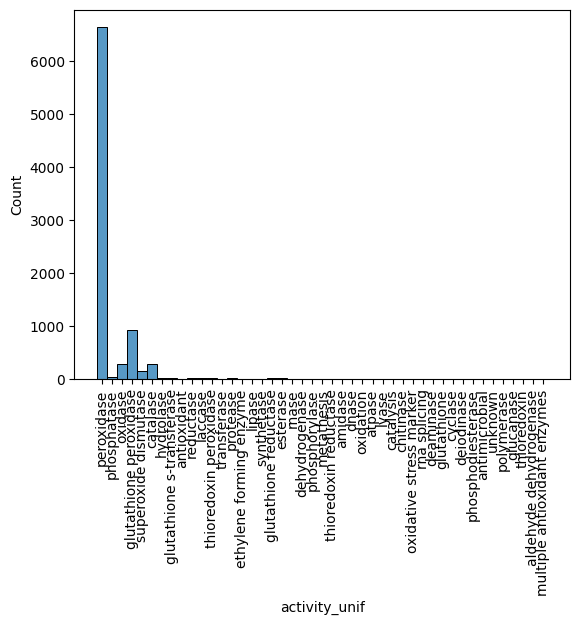

In [19]:
sns.histplot(df["activity_unif"])
plt.xticks(rotation=90);

###### удаление редких 

In [14]:
activity_counts = df['activity_unif'].value_counts()
frequent_activities = activity_counts[activity_counts >= 10].index.tolist()
df['activity_unif'] = df['activity_unif'].where(df['activity_unif'].isin(frequent_activities), None)

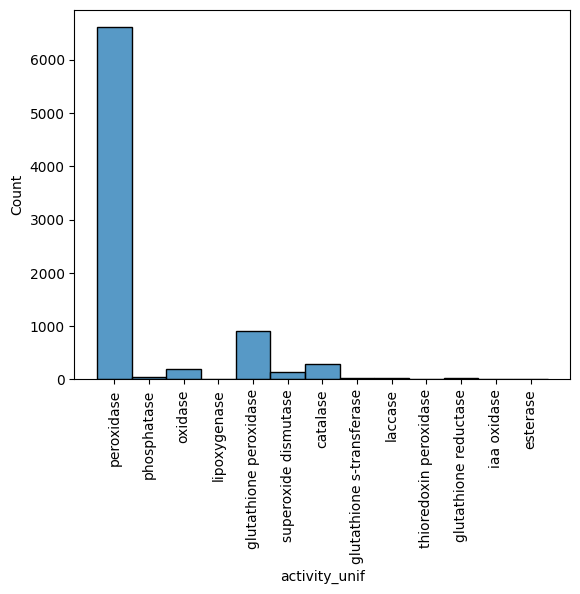

In [15]:
sns.histplot(df["activity_unif"])
plt.xticks(rotation=90);

##### Уменьшение количества polymer

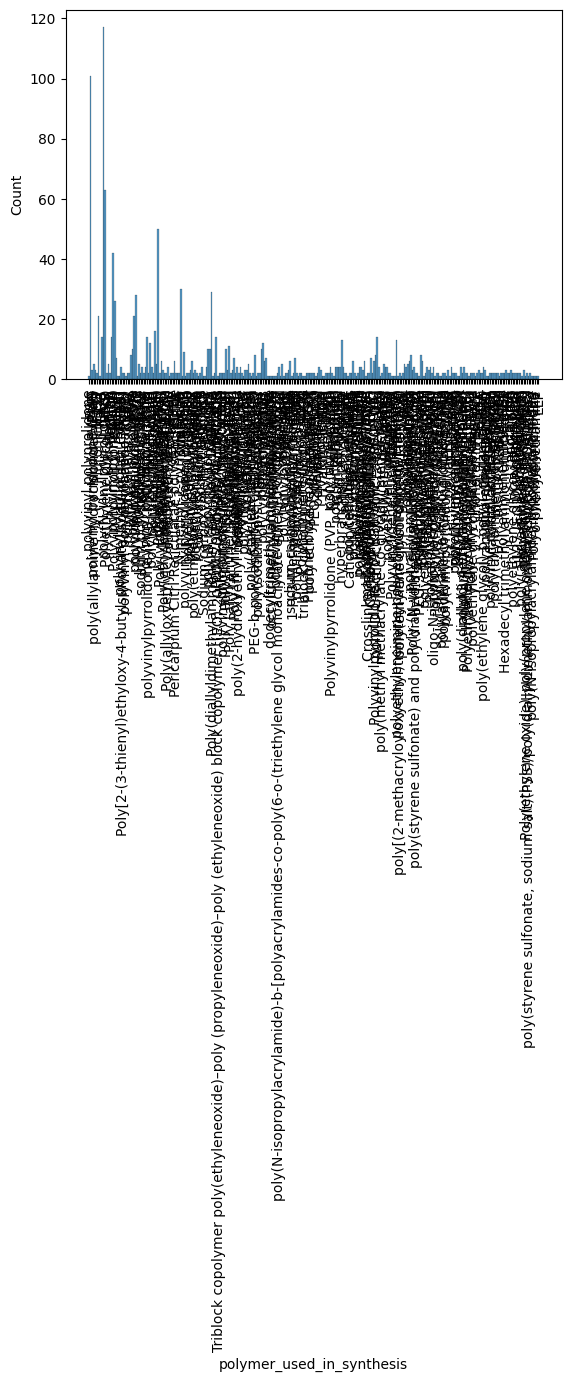

In [20]:
sns.histplot(df["polymer_used_in_synthesis"])
plt.xticks(rotation=90);

In [21]:
polymer_names = df["polymer_used_in_synthesis"].value_counts().index.to_numpy()
polymer_names

array(['poly(N-Vinylpyrrolidone)', 'BSA', 'PVP', 'poly(ethylene oxide)',
       'polyvinylpyrrolidone', 'chitosan', 'polydopamine',
       'polyvinylpyrrolidone (PVP)', 'Polyvinylpyrrolidone (PVP)',
       'Pluronic F127', 'polyvinyl pyrrolidone', 'poly(ethylene glycol)',
       'dextran', 'PEG', 'Polyvinyl pyrrolidone (PVP)',
       'poly(D,L-lactic-co-glycolic) acid (PLGA)', 'Polyvinylpyrrolidone',
       'hyperbranched polyglycidol', 'polyethyleneimine', 'polypyrrole',
       'poly(vinylpyrrolidone)', 'polyethylene glycol', 'Chitosan', 'PVA',
       'polyacrylamide', 'PSS', 'poly(N-isopropylacrylamide)', 'Nafion',
       'Polyvinylpyrrolidone (PVP K30, MW = 40000 Da)', 'polyA',
       'polyallylamine hydrochloride', 'PEG-3,4-dihydroxy benzyl amine',
       'PEG-200', 'Gelatin', 'CTAB', 'poly(vinyl alcohol)',
       'poly(vinyl pyrrolidone)', 'Poly(vinylpyrrolidone) (PVP)',
       'hyaluronic acid', 'Poly(vinyl pyrrolidone) (PVP)', 'DNA',
       'Pluronic P123', 'PAMPS', 'PEG–vitamin

In [22]:
polymers_map = {
    # Polyvinylpyrrolidone (PVP)
    'poly(n-vinylpyrrolidone)': 'Poly(N-Vinylpyrrolidone)',
    'pvp': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl pyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'poly(vinylpyrrolidone)': 'Poly(N-Vinylpyrrolidone)',
    'poly(vinyl pyrrolidone)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl pyrrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (pvp k30, mw = 40000 da)': 'Poly(N-Vinylpyrrolidone)',
    'poly-(n-vinyl-2-pyrrolidone) (pvp∙k30)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (pvp-10)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinypyrrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'poly(vinyl pyrrolidone) (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (pvp, k30, mw=40000)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (pvp, mw 30,000)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl pyrrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'polyclar at': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpolypyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl polypyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl polyprolidone': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl poly-pyrolidone (pvpp)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpolypyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'poly(vinylpyrrolidone)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl pyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl pyrrolidone (pvp)': 'Poly(N-Vinylpyrrolidone)',
        # Polyvinylpyrrolidone (PVP)
    'polyvinylpyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'Polyvinylpyrrolidone': 'Poly(N-Vinylpyrrolidone)',
    'Poly(vinylpyrrolidone) (PVP)': 'Poly(N-Vinylpyrrolidone)',
    'Polyvinylpyrrolidone (PVP, K-30)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl pyrrolidone (PVP-K30)': 'Poly(N-Vinylpyrrolidone)',
    'PVP (K-30)': 'Poly(N-Vinylpyrrolidone)',
    'PVP-40': 'Poly(N-Vinylpyrrolidone)',
    'Poly (vinyl pyrrolidone) (PVP)': 'Poly(N-Vinylpyrrolidone)',
    'Poly(N-vinyl-2-pyrrolidone) (PVP)': 'Poly(N-Vinylpyrrolidone)',
    'Crosslinked polyvinylpyrrolidone (40%)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (PVP, K30)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpyrrolidone (PVP, K30, MW ≈ 3800)': 'Poly(N-Vinylpyrrolidone)',
    'PVP K30': 'Poly(N-Vinylpyrrolidone)',
    'polyvinyl-pyrrolidone (PVP-10)': 'Poly(N-Vinylpyrrolidone)',
    'polyvinylpolypyrrolidone (PVPP)': 'Poly(N-Vinylpyrrolidone)',
    'PVPP': 'Poly(N-Vinylpyrrolidone)',

    # Polyethylene glycol (PEG)
    'peg': 'poly(ethylene glycol)',
    'peg-200': 'poly(ethylene glycol)',
    'peg-400': 'poly(ethylene glycol)',
    'peg 4000': 'poly(ethylene glycol)',
    'peg 20000': 'poly(ethylene glycol)',
    'peg 20,000': 'poly(ethylene glycol)',
    'peg-4000': 'poly(ethylene glycol)',
    'polyethylene glycol 4000': 'poly(ethylene glycol)',
    'polyethylene glycol-400': 'poly(ethylene glycol)',
    'polyethylene glycol 20000': 'poly(ethylene glycol)',
    'polyethylene glycol (peg 1000)': 'poly(ethylene glycol)',
    'polyethylene glycol (peg)': 'poly(ethylene glycol)',
    'polyethylene glycol (peg-4000)': 'poly(ethylene glycol)',
    'polyethylene glycol 20,000': 'poly(ethylene glycol)',
    'polyethyleneglycol-8000': 'poly(ethylene glycol)',
    'polyethylene glycol (peg 4.6k)': 'poly(ethylene glycol)',
    'polyethyleneglycol 3550': 'poly(ethylene glycol)',
    'polyethylene glycol 2000': 'poly(ethylene glycol)',
    'poly(ethylene oxide)': 'poly(ethylene glycol)',
    'poly(ethylene glycol)': 'poly(ethylene glycol)',
    'poly(ethylene glycol) 4000': 'poly(ethylene glycol)',
    'peo20ppo70peo20': 'poly(ethylene glycol)',
    # Polyethylene glycol (PEG)
    'polyethylene glycol': 'poly(ethylene glycol)',
    'Polyethylene glycol': 'poly(ethylene glycol)',
    'PEG-3,4-dihydroxy benzyl amine': 'poly(ethylene glycol)',
    'PEG–vitamin E': 'poly(ethylene glycol)',
    'Poly(ethylene glycol) (PEG 4.6k)': 'poly(ethylene glycol)',
    'Polyethyleneglycol (PEG) 4000': 'poly(ethylene glycol)',
    'Polyethylene glycol 20,000 (PEG 20,000)': 'poly(ethylene glycol)',
    'poly eth yl ene gly -col(4000)': 'poly(ethylene glycol)',
    'polyethylene glycol dicarboxylic acid': 'poly(ethylene glycol)',
    'PEG 600': 'poly(ethylene glycol)',
    'PEG-SH': 'poly(ethylene glycol)',
    'methoxy PEG thiol': 'poly(ethylene glycol)',
    'PEG-b-PVIm': 'poly(ethylene glycol)',
    'PEG-pLL': 'poly(ethylene glycol)',
    'PEG-pLL 50': 'poly(ethylene glycol)',
    'poly(ethylene glycol)-b-poly(L-glutamic acid)': 'poly(ethylene glycol)',
    'poly(ethylene glycol dimethylacrylate)': 'poly(ethylene glycol)',
    'poly(ethyleneglycol)methylether': 'poly(ethylene glycol)',
    # Chitosan
    'chitosan': 'chitosan',
    'chitosan (cs)': 'chitosan',

    # Polydopamine (PDA)
    'polydopamine': 'poly(dopamine)',
    'poly(dopamine)': 'poly(dopamine)',
    'pda': 'poly(dopamine)',
    'pppda': 'poly(dopamine)',

    # Pluronic F127
    'pluronic f127': 'pluronic f127',
    'pluronic@f127': 'pluronic f127',
    'pluronic block copolymer f127': 'pluronic f127',
    'f127': 'pluronic f127',
    'f127 (eo106po70eo106)': 'pluronic f127',

    # Polyethyleneimine (PEI)
    'polyethyleneimine': 'poly(ethylene imine)',
    'polyethylenimine (pei)': 'poly(ethylene imine)',
    'poly(ethylenimine)': 'poly(ethylene imine)',
    'poly(ethylene imine)': 'poly(ethylene imine)',
    'bpei': 'poly(ethylene imine)',
    'pei': 'poly(ethylene imine)',
    'polyethylenimine (pei)': 'poly(ethylene imine)',

    # Poly(vinyl alcohol) (PVA)
    'pva': 'poly(vinyl alcohol)',
    'poly(vinyl alcohol)': 'poly(vinyl alcohol)',
    'polyvinyl alcohol (pva)': 'poly(vinyl alcohol)',
    'polyvinyl alcohol': 'poly(vinyl alcohol)',

    # Poly(N-isopropylacrylamide) (PNIPAM)
    'poly(n-isopropylacrylamide)': 'Poly(N-isopropylacrylamide)',
    'nipam': 'Poly(N-isopropylacrylamide)',
    'nipaam': 'Poly(N-isopropylacrylamide)',
    
    # Hyaluronic acid (HA)
    'hyaluronic acid': 'hyaluronic acid',
    'ha': 'hyaluronic acid',

    # Gelatin
    'gelatin': 'gelatin',
    'gelatin (type b)': 'gelatin',

    # Dextran
    'dextran': 'dextran',

    # CTAB
    'ctab': 'ctab',
    
    # DNA
    'dna': 'dna',
    'ssdna': 'dna',
    
    # Bovine Serum Albumin (BSA)
    'bsa': 'BSA',
    'bovine serum albumin': 'BSA',
    
    # Polyacrylamide
    'paam': 'poly(acryl amide)',
    'polyacrylamide': 'poly(acryl amide)',

    # Others
    'polyacrylic acid': 'poly(acrylic acid)',
    'poly(acrylic acid)': 'poly(acrylic acid)',
    'pss': 'poly(styrene sulfonate)',
    'pampps': 'poly(styrene sulfonate)',
    'pani': 'poly(aniline)',
    'pedot': 'poly(3,4-ethylenedioxythiophene)',
    'pmma': 'poly(methyl methacrylate)',
    'pan': 'poly(acrylonitrile)',
    'ppv': 'poly(p-phenylene vinylene)',
    'ps-hobt': 'poly(styrene sulfonate)',
    'pβ-cd': 'β-cyclodextrin',

    'polyaniline': 'poly(aniline)',
    'PPy': 'poly(aniline)',

    # Polystyrene derivatives
    'poly(styrenesulfate)': 'poly(styrene sulfonate)',
    'sodium polystyrene sulfonate': 'poly(styrene sulfonate)',
    'sulfonated polystyrene': 'poly(styrene sulfonate)',
    'poly(styrene sulfonate) and poly(diallyldimethylammonium chloride)': 'poly(styrene sulfonate)',
    'poly(styrene sulfonate, sodium salt)(PSS)/poly(diallyldimethylammonium) chloride (PDADMAC)': 'poly(styrene sulfonate)',
    'chloromethylated polystyrene': 'chloromethylated polystyrene',

    # Polyacrylonitrile
    'Polyacrylonitrile': 'Poly(acrylonitrile)',

    # Polydiallyldimethylammonium chloride (PDADMAC)
    'poly(diallyldimethylammonium chloride)': 'poly(diallyldimethylammonium chloride)',
    'Poly(diallyldimethylammonium chloride) (PDADMAC)': 'poly(diallyldimethylammonium chloride)',

    # Polyallylamine hydrochloride (PAH)
    'polyallylamine hydrochloride': 'poly(allylamine hydrochloride)',
    'poly(allylamine hydrochloride) (PAH)': 'poly(allylamine hydrochloride)',
    'Poly(allyl amine hydrochloride) (PAH)': 'poly(allylamine hydrochloride)',
    'poly(allyl amine hydrochloride)': 'poly(allylamine hydrochloride)',

    # Nafion
    'Nafion': 'Nafion',
    'nafion': 'Nafion',

    # Others
    'hyperbranched polyglycidol': 'Hyperbranched polyglycidol',
    'polypyrrole': 'Polypyrrole',
    'agarose': 'Agarose',
    'polyA': 'Polyadenine',
    'Pluronic P123': 'Pluronic P123',
    'PAMPS': 'Poly(2-acrylamido-2-methyl-1-propanesulfonic acid)',
    'Fmoc-Gly Alko-PEG resin': 'Fmoc-Gly Alko-PEG resin',
    'EDTA': 'Ethylenediaminetetraacetic acid',
    'CMC': 'Carboxymethyl cellulose',
    'Protamine': 'Protamine',
    'Polyoxometalates': 'Polyoxometalates',
    'D,L-lactide': 'D,L-lactide',
    'DSPE-mPEG 2K': 'DSPE-mPEG',
    'poly-L-lysine': 'Poly-L-lysine',
    'PLL-g-Dex': 'Poly-L-lysine-grafted dextran',
    'oleic acid': 'Oleic acid',
    'Sodium alginate': 'Sodium alginate',
    'carboxymethyl cellulose': 'Carboxymethyl cellulose',
    'APTES': '3-Aminopropyltriethoxysilane',
    'sodium lignosulfonate': 'Sodium lignosulfonate',
    'pS-PEG': 'Phosphorylated PEG',
    'Gum kondagogu': 'Gum kondagogu',
    'poly(vinyl chloride)': 'Poly(vinyl chloride)',
    'silk fibroin': 'Silk fibroin',
    'apoferritin': 'Apoferritin',
    'Hexadecyl trimethyl ammonium chloride': 'Hexadecyl trimethyl ammonium chloride',
    'polyethylenimine': 'Polyethylenimine',
    'Polyethyleneimine (PEI)': 'Polyethylenimine',
    'poly(ethyleneimine)': 'Polyethylenimine',
    'cotton fabric': 'Cotton fabric',
    'polyT20': 'Polythymine',
    'β-cyclodextrin': 'Beta-cyclodextrin',
    'SA': 'Stearic acid',
    'starch': 'Starch',
    'C 18-PEG': 'C18-PEG',
    'pVIII': 'pVIII',
    'β-casein': 'Beta-casein',
    'Poly (acrylic acid)': 'Poly(acrylic acid)',
    'poly(2-hydroxyethyl methacrylate) (PHEMA)': 'Poly(2-hydroxyethyl methacrylate)',
    'Heparin': 'Heparin',
    'poly(vinyl alcohol) (PVA)': 'Poly(vinyl alcohol)',
    'pepsin': 'Pepsin',
    'polymethacrylate': 'Polymethacrylate',
    'silica': 'Silica',
    'glutathione': 'Glutathione',
    'calcium alginate-pectin': 'Calcium alginate-pectin',
    'DSPE-PEG': 'DSPE-PEG',
    'Triblock copolymer poly(ethyleneoxide)–poly (propyleneoxide)–poly (ethyleneoxide) block copolymer ((EO) 20(PO) 70(EO) 20, Pluronic 123)': 'Pluronic 123',
    '1 H-3-Methylimidazolium acetate': 'Ionic liquid',
    'chitin': 'Chitin',
    'Triton-X': 'Triton-X',
    'Poly(ethylene oxide)–poly(propylene oxide)–poly(ethylene oxide)': 'Poly(ethylene oxide)-block-poly(propylene oxide)-block-poly(ethylene oxide)',
    'gum olibanum': 'Gum olibanum',
    'maltose-binding protein (MBP)': 'Maltose-binding protein',
    'Pericarpium Citri Reticulatae polysaccharide': 'Citrus polysaccharide',
    'Melamine (MA)': 'Melamine',
    'poly(acryloyl morpholine)': 'Poly(acryloyl morpholine)',
    'PEG-PAMA': 'PEG-PAMA',
    'poly(o-anisidine)': 'Poly(o-anisidine)',
    'poly(methyl methacrylate-co-glycidyl methacrylate)': 'Poly(methyl methacrylate-co-glycidyl methacrylate)',
    'N-methyl-2-pyrrolidinone': 'N-Methyl-2-pyrrolidone',
    'DETA': 'Diethylenetriamine',
    'P(BZMA-co-GMA)': 'Poly(benzyl methacrylate-co-glycidyl methacrylate)',
    'poly[(2-methacryloyloxyethyl)trimethyl ammonium chloride] (PMOTA)': 'Poly[(2-methacryloyloxyethyl)trimethyl ammonium chloride]',
    'LP': 'Lipopolysaccharide',
    'poly(N-vinylcaprolactam)': 'Poly(N-vinylcaprolactam)',
    'SIL-PEG-SIL': 'Silica-PEG-Silica',
    'β-CDP': 'Beta-cyclodextrin polymer',
    'oleylamine': 'Oleylamine',
    'gellan': 'Gellan gum',
    'cellulose': 'Cellulose',
    'triblock copolymer pluronic P123': 'Pluronic P123',
    'octyltrimethylammonium bromide': 'Octyltrimethylammonium bromide',
    'l-phenylalanine': 'L-Phenylalanine',
    'dodecyltrimethylammonium bromide': 'Dodecyltrimethylammonium bromide',
    'l-alanine': 'L-Alanine',
    'cholesterol': 'Cholesterol',
    'trisodium citrate': 'Trisodium citrate',
    'PDMS 90-b-PMOXA 10-COOH': 'PDMS-block-PMOXA',
    'sodium carboxymethyl cellulose': 'Sodium carboxymethyl cellulose',
    'poly(ethylene terephthalate)': 'Poly(ethylene terephthalate)',
    'PEG-b-poly(aspartate diethyltriamine)': 'PEG-block-poly(aspartate diethyltriamine)',
    'PDDA': 'Poly(diallyldimethylammonium chloride)',
    'acrylamide': 'Acrylamide',
    'sodium polyacrylate (PAA)': 'Sodium polyacrylate',
    'poly(vinylpyrrolidone) M_n 55,000': 'Polyvinylpyrrolidone',
    'oligo-N-isopropylacrylamide (ONIPAAm)': 'Oligo-N-isopropylacrylamide',
    'Tween 20': 'Tween 20',
    'Tween 80': 'Tween 80',
    'Carboxymethyl guar gum': 'Carboxymethyl guar gum',
    'polyamidoamine dendrimer': 'Polyamidoamine dendrimer',
    'PDMC': 'Poly(dimethyl diallyl ammonium chloride)',
    'Nylon': 'Nylon',
    'Phytagel': 'Phytagel',
    'Poly Bed 812': 'Poly Bed 812',
    'poly(N-isopropylacrylamide)-b-polyacrylamides': 'Poly(N-isopropylacrylamide)-block-polyacrylamides',
    'Pluronic F-127': 'Pluronic F-127',
    'o-phenylenediamine': 'O-Phenylenediamine',
    'ELP': 'Elastin-like polypeptide',
    # Poly(D,L-lactic-co-glycolic) acid (PLGA)
    'poly(D,L-lactic-co-glycolic) acid (PLGA)': 'Poly(D,L-lactic-co-glycolic acid) (PLGA)',

    # Poly(allyloxyethylcyanoacrylate) (P-AOECA)
    'Poly(allyloxyethylcyanoacrylate) (P-AOECA)': 'Poly(allyloxyethylcyanoacrylate)',

    # poly(N-isopropylacrylamide)-b-[polyacrylamides-co-poly(6-o-(triethylene glycol monoacrylate ether)-b-cyclodextrin)]
    'poly(N-isopropylacrylamide)-b-[polyacrylamides-co-poly(6-o-(triethylene glycol monoacrylate ether)-b-cyclodextrin)]': 'Poly(N-isopropylacrylamide)-block-[polyacrylamides-co-poly(cyclodextrin)]',

    # poly(MAA-co-EDMA)
    'poly(MAA-co-EDMA)': 'Poly(methacrylic acid-co-ethylene glycol dimethacrylate)',

    # Maltodextrin
    'Maltodextrin': 'Maltodextrin',

    # DOPA-PIMA-PEG
    'DOPA-PIMA-PEG': 'DOPA-PIMA-PEG',

    # poly(sodium-p-styrenesulfonate)
    'poly(sodium-p-styrenesulfonate)': 'Poly(sodium styrenesulfonate)',

    # Poly (N-vinyl-2-pyrrolidone) (PVP)
    'Poly (N-vinyl-2-pyrrolidone) (PVP)': 'Poly(N-vinyl-2-pyrrolidone)',

    # Poly (allyl amine hydrochloride) (PAH)
    'Poly (allyl amine hydrochloride) (PAH)': 'poly(allylamine hydrochloride)',

    # Triblock copolymer poly(ethyleneoxide)–poly (propyleneoxide)–poly (ethyleneoxide) block copolymer ((EO) 20(PO) 70(EO) 20, Pluronic 123
    'Triblock copolymer poly(ethyleneoxide)–poly (propyleneoxide)–poly (ethyleneoxide) block copolymer ((EO) 20(PO) 70(EO) 20, Pluronic 123': 'Pluronic P123',

    # PMNT
    'PMNT': 'PMNT',  # Specific polymer, no standardization needed unless more context is provided.

    # calcium alginate–pectin
    'calcium alginate–pectin': 'Calcium alginate-pectin',

    # poly(amidoamine)
    'poly(amidoamine)': 'Poly(amidoamine)',

    # poly(styrene/acrolein)
    'poly(styrene/acrolein)': 'Poly(styrene-co-acrolein)',

    # PAH
    'PAH': 'poly(allylamine hydrochloride)',

    # Poly[2-(3-thienyl)ethyloxy-4-butylsulfonate] sodium salt (PTEBS)
    'Poly[2-(3-thienyl)ethyloxy-4-butylsulfonate] sodium salt (PTEBS)': 'Poly(thienylethyloxy butylsulfonate)',

    # poly(3,4-ethylenedioxythiophene)
    'poly(3,4-ethylenedioxythiophene)': 'Poly(3,4-ethylenedioxythiophene)',

    # poly(allylamine hydrochloride)
    'poly(allylamine hydrochloride)': 'poly(allylamine hydrochloride)',

    # Chondroitin sulfate
    'Chondroitin sulfate': 'Chondroitin sulfate',

    # polyvinyl polypyrrolidone (PVPP)
    'polyvinyl polypyrrolidone (PVPP)': 'Polyvinylpolypyrrolidone',

    # Cationic cellulose nanofibrils
    'Cationic cellulose nanofibrils': 'Cationic cellulose nanofibrils',

    # PDI
    'PDI': 'Polydispersity index',  # Not a polymer, but a property of polymers.

    # Carboxymethyl cellulose (CMC)
    'Carboxymethyl cellulose (CMC)': 'Carboxymethyl cellulose',

    # polyadenine-containing diblock DNA
    'polyadenine-containing diblock DNA': 'Polyadenine-containing diblock DNA',

    # polyvinylpyrrolidone-25
    'polyvinylpyrrolidone-25': 'Polyvinylpyrrolidone',

    # ChEO 15
    'ChEO 15': 'ChEO 15',  # Specific polymer, no standardization needed unless more context is provided.

    # polytetrafluoroethylene
    'polytetrafluoroethylene': 'Poly(tetrafluoroethylene)',

    # polyethyleneimine-poly(ethylene glycol) (PEI-PEG)
    'polyethyleneimine-poly(ethylene glycol) (PEI-PEG)': 'Polyethyleneimine-poly(ethylene glycol)',

    # MDMO-PPV
    'MDMO-PPV': 'MDMO-PPV',  # Specific polymer, no standardization needed unless more context is provided.

    # Polyvinylidene fluoride (PVDF)
    'Polyvinylidene fluoride (PVDF)': 'Poly(vinylidene)fluoride',

    # glucose
    'glucose': 'Glucose',  # Not a polymer, but a monosaccharide.

    # polyvinylpoly-pyrolidone
    'polyvinylpoly-pyrolidone': 'polyvinylpoly-pyrolidone',
}
polymers_map = {key.lower(): value for key, value in polymers_map.items()}

df['polymer_used_in_synthesis'] = df['polymer_used_in_synthesis'].str.strip().str.lower()
df['polymer_unif'] = df['polymer_used_in_synthesis'].replace(polymers_map)

In [23]:
df['polymer_unif'].value_counts()[:20]

polymer_unif
Poly(N-Vinylpyrrolidone)                    431
poly(ethylene glycol)                       185
BSA                                         103
chitosan                                     45
poly(dopamine)                               38
poly(ethylene imine)                         32
pluronic f127                                29
poly(styrene sulfonate)                      24
poly(vinyl alcohol)                          23
poly(allylamine hydrochloride)               20
poly(acryl amide)                            15
Poly(N-isopropylacrylamide)                  15
dextran                                      14
Poly(D,L-lactic-co-glycolic acid) (PLGA)     14
Hyperbranched polyglycidol                   13
Nafion                                       12
Carboxymethyl cellulose                      12
Polypyrrole                                  12
gelatin                                      11
poly(aniline)                                11
Name: count, dtype: int64

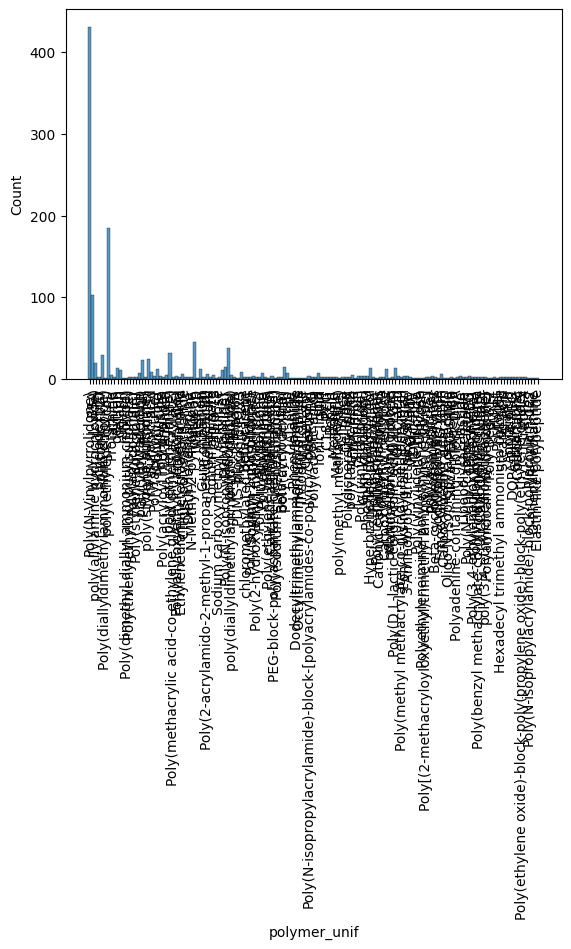

In [24]:
sns.histplot(df["polymer_unif"])
plt.xticks(rotation=90);

##### Уменьшение количества surfactant

In [25]:
print(df["surfactant"].value_counts().index.to_list())

['Triton X-100', 'CTAB', 'sodium citrate', 'ascorbic acid', 'ethylene glycol', 'oleic acid', 'trisodium citrate', 'Tween 20', 'L-ascorbic acid', 'oleylamine', 'Tween 80', 'Cetyltrimethylammonium bromide (CTAB)', 'cetyltrimethylammonium bromide', 'Sodium citrate', 'SDS', 'Ethylene glycol', 'Ascorbic acid', 'citric acid', 'poly(N-Vinylpyrrolidone)', 'TritonX-100 (TX-100)', 'sodium citrate tribasic dehydrate', 'didecyldimethylammonium bromide (DDAB)', 'Cetyltrimethylammonium bromide', 'Tween-20', 'sodium dodecyl sulfate', 'KBr', 'Cetyltrimethyl ammonium bromide', 'C6H5Na3O7·2H2O', 'trisodium citrate dihydrate', 'triton X-100', 'Pluronic F127', 'PVP', 'sodium cholate', 'hexadecyl trimethyl ammonium bromide', 'ethanol', 'Emasol 1130', 'triethylamine', 'CTAC', 'sodium dodecyl sulfate (SDS)', 'sodium citrate dihydrate', 'polyoxyethylene sorbitolester (Tween), polyoxyethylene octylphenol (Triton X-100)', 'Sodium dodecyl sulfate (SDS)', 'Sodium n-dodecylsulphate (SDS) and Sodium bis(2-ethylhexy

In [27]:
import numpy as np

In [33]:
ger_gescriptors_by_names(('Tween 20',))

{'MolWt': 522.7,
 'XLogP': 2.5,
 'TPSA': 133.0,
 'Complexity': 507.0,
 'PEOE_VSA7': 6.4208216229260096,
 'PEOE_VSA9': 59.46193768061625,
 'VSA_EState8': np.float64(2.8759487702029274),
 'Kappa2': 23.28019824475155,
 'BalabanJ': np.float64(2.267923922124221),
 'MinAbsEStateIndex': np.float64(0.09374643067103383),
 'MinEStateIndex': np.float64(-0.554404182634459),
 'EState_VSA6': np.float64(0.0),
 'VSA_EState4': np.float64(0.0),
 'PEOE_VSA8': 6.4208216229260096,
 'MinPartialCharge': -0.46321984283671436,
 'EState_VSA4': np.float64(19.26246486877803),
 'SMR_VSA7': 0.0,
 'BCUT2D_CHGLO': -2.2884986330655854}

In [34]:
surf_map = {
    # Triton X-100
    'Triton X-100': 'Triton X-100',
    'TritonX-100 (TX-100)': 'Triton X-100',
    'triton X-100': 'Triton X-100',
    'Triton-X 100': 'Triton X-100',
    'Triton X-405': 'Triton X-405',
    'Triton CF-54': 'Triton CF-54',

    # CTAB and related compounds
    'CTAB': 'Cetyltrimethylammonium bromide',
    'Cetyltrimethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'cetyltrimethylammonium bromide': 'Cetyltrimethylammonium bromide',
    'Hexadecyl trimethyl ammonium bromide': 'Cetyltrimethylammonium bromide',
    'hexadecyltrimethylammonium bromide': 'Cetyltrimethylammonium bromide',
    'Cetyltrimethylammoniumbromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'Cetrimonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'Cetyltrimethyl ammonium bromide': 'Cetyltrimethylammonium bromide',
    'N-cetyltrimethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'Hexadecyltrimethylammonium bromide (HTAB)': 'Cetyltrimethylammonium bromide',
    'Cetyltrimethylammonium (CTAB)': 'Cetyltrimethylammonium bromide',
    'cetyl trimethyl ammonium bromide': 'Cetyltrimethylammonium bromide',
    'Cetylmethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'cetyltrimethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'hexadecyl trimethyl ammonium bromide': 'Cetyltrimethylammonium bromide',
    'hexadecyl trimethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'hexadecyl-trimethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'hexadecyltrimethylammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'Cetyl trimethyl ammonium bromide': 'Cetyltrimethylammonium bromide',
    'cetyltrimethylammoniumbromide': 'Cetyltrimethylammonium bromide',

    # Tween 20 and 80
    'Tween 20': 'Tween 20',
    'Tween-20': 'Tween 20',
    'polyoxyethylene sorbitolester (Tween), polyoxyethylene octylphenol (Triton X-100)': 'Tween 20',
    'Tween 80': 'Tween 80',
    'Tween-80': 'Tween 80',

    # SDS and related compounds
    'SDS': 'Sodium dodecyl sulfate',
    'sodium dodecyl sulfate': 'Sodium dodecyl sulfate',
    'Sodium dodecyl sulfate (SDS)': 'Sodium dodecyl sulfate',
    'Sodium n-dodecylsulphate (SDS) and Sodium bis(2-ethylhexyl)sulfosuccinate (AOT)': 'Sodium dodecyl sulfate',
    'Sodium dodecyl benzene sulfonate (SDBS)': 'Sodium dodecyl sulfate',
    'Sodium dodecylsulphate (SDS)': 'Sodium dodecyl sulfate',
    'Sodium dodecylbenzenesulfonate': 'Sodium dodecyl sulfate',
    'sodium dodecyl sulfate (SDS)': 'Sodium dodecyl sulfate',
    'sodium dodecylsulphate (SDS)': 'Sodium dodecyl sulfate',
    'SDBS': 'Sodium dodecyl sulfate',
    'SDS/DTAB': 'Sodium dodecyl sulfate / Dodecyltrimethylammonium bromide',

    # AOT and related compounds
    'AOT': 'Sodium bis(2-ethylhexyl)sulfosuccinate',
    'sodium bis(2-ethylhexyl)sulfosuccinate': 'Sodium bis(2-ethylhexyl)sulfosuccinate',
    'Aerosol OT': 'Sodium bis(2-ethylhexyl)sulfosuccinate',
    'dioctylsulfosuccinate sodium salt': 'Sodium bis(2-ethylhexyl)sulfosuccinate',

    # Pluronic F127 and P123
    'Pluronic F127': 'Pluronic F127',
    'Pluronic P123': 'Pluronic P123',
    'PEO20PPO70PEO20': 'Pluronic P123',
    'Triblock copolymer poly(ethyleneoxide)–poly (propyleneoxide)–poly (ethyleneoxide) block copolymer ((EO) 20(PO) 70(EO) 20, Pluronic 123': 'Pluronic P123',

    # Sodium citrate and related compounds
    'sodium citrate': 'Sodium citrate',
    'Sodium citrate': 'Sodium citrate',
    'trisodium citrate': 'Sodium citrate',
    'trisodium citrate dihydrate': 'Sodium citrate',
    'sodium citrate tribasic dehydrate': 'Sodium citrate',
    'Trisodium citrate': 'Sodium citrate',
    'sodium citrate dehydrate': 'Sodium citrate',
    'sodium tricitrate': 'Sodium citrate',
    'sodium citrate dihydrate': 'Sodium citrate',
    'citrate': 'Sodium citrate',  # Assuming generic "citrate" refers to sodium citrate

    # Ascorbic acid and related compounds
    'ascorbic acid': 'Ascorbic acid',
    'Ascorbic acid': 'Ascorbic acid',
    'L-ascorbic acid': 'Ascorbic acid',
    'L-Ascorbic acid': 'Ascorbic acid',
    'L-Ascorbic': 'Ascorbic acid',
    'ascorbic acid (AA)': 'Ascorbic acid',
    'L-Ascorbic acid (VC)': 'Ascorbic acid',
    'sodium ascorbate': 'Ascorbic acid',
    'Ascorbate': 'Ascorbic acid',
    'l-ascorbic acid': 'Ascorbic acid',
    'AA': 'Ascorbic acid',

    # Oleic acid and related compounds
    'oleic acid': 'Oleic acid',
    'Oleic acid': 'Oleic acid',
    'oleylamine': 'Oleylamine',
    'oleyl alcohol': 'Oleyl alcohol',

    # Other specific surfactants
    'didecyldimethylammonium bromide (DDAB)': 'Didecyldimethylammonium bromide',
    'Dodecyltrimethylammonium bromide (DTAB)': 'Dodecyltrimethylammonium bromide',
    'Tetradecyltrimethylammonium bromide (TTAB)': 'Tetradecyltrimethylammonium bromide',
    'Cetyltrimethylammonium chloride (CTAC)': 'Cetyltrimethylammonium chloride',
    'Cetyltrimethylammonium tosylate (CTATos)': 'Cetyltrimethylammonium tosylate',
    'Hexadecyl trimethyl ammonium chloride': 'Hexadecyl trimethyl ammonium chloride',
    'CTAC': 'Cetyltrimethylammonium chloride',

    # Non-surfactant additives
    '0.1% teepol': np.nan,
    '1-Butyl-3-methylimidazolium hexafluorophosphate (BMIPF6)': np.nan,
    '1-H-3-Methylimidazolium formate': np.nan,
    '2-methyl-2,4-pentanediol': np.nan,
    'C 12-LAS': np.nan,
    'C6H5Na3O7·2H2O': np.nan,
    'ChEO 15': np.nan,
    'Emasol 1130': np.nan,
    'N-cetyltrimethylammonium bromide': 'Cetyltrimethylammonium bromide',
    'PVP': np.nan,
    'Polyclar AT': np.nan,
    'Polyethylene glycol': np.nan,
    'Polyvinylpyrrolidone': np.nan,
    'Sandoclean PC': np.nan,
    'TBAB': np.nan,
    '[Cho][AOT]': 'Choline dioctylsulfosuccinate',
    'citrate': 'Sodium citrate',
    'cysteamine': np.nan,
    'ethylene glycol': np.nan,
    'sodium 2-mercaptoethanesulfonate (MPS)': np.nan,
    'sodium cholate': np.nan,
    'sodium n-tetradecanesulfonate': np.nan,
    'surfactant': np.nan,
    'triethylamine': np.nan,

    ###
    '1-octanol': np.nan,  # Not a surfactant
    'APTES': np.nan,  # Not a surfactant
    'BCL': np.nan,  # Not a surfactant
    'C12H25N(CH3)2–C12H24–N(CH3)2C12H25Br2': np.nan,  # Not a surfactant
    'C12H25N(COC(CH3)=CH2)-(C2H40)Is-H': np.nan,  # Not a surfactant
    'C18H37NH(C2H40)10-H': np.nan,  # Not a surfactant
    'C18H37NH(C2H40)15-H': np.nan,  # Not a surfactant
    'CHAPS': 'CHAPS',  # Zwitterionic surfactant
    'Cetrimonium bromide': 'Cetyltrimethylammonium bromide',
    'Cetyltrimethyl ammonium bromide (CTAB)': 'Cetyltrimethylammonium bromide',
    'Cetyltrimethylammonium bromide': 'Cetyltrimethylammonium bromide',
    'CnTAFB (n = 12, 14, 16)': np.nan,  # Not a surfactant
    'Ethylene glycol': np.nan,  # Not a surfactant
    'Hexadecyltrimethylammonium bromide': 'Cetyltrimethylammonium bromide',
    'Hydrogen peroxide (H2O2)': np.nan,  # Not a surfactant
    'KBr': np.nan,  # Not a surfactant
    'Lauric acid': np.nan,  # Not a surfactant
    'Lauryl maltoside (LM)': 'Lauryl maltoside',
    'N-decyl-heptaethyleneglycol mono-ether (C10E7)': np.nan,  # Not a surfactant
    'PEG 20000': np.nan,  # Not a surfactant
    'PEG-400': np.nan,  # Not a surfactant
    'Potassium bromide (KBr)': np.nan,  # Not a surfactant
    'Sodium dodecyl sulfate': 'Sodium dodecyl sulfate',
    'Span 80': 'Span 80',
    'Span 85': 'Span 85',
    'TOCL': np.nan,  # Not a surfactant
    'Tyrosine': np.nan,  # Not a surfactant
    'butanol': np.nan,  # Not a surfactant
    'choline dioctylsulfosuccinate ([Cho][AOT])': 'Choline dioctylsulfosuccinate',
    'citric acid': np.nan,  # Not a surfactant
    'dioleyl N-d-glucono-l-glutamate': np.nan,  # Not a surfactant
    'dioleyl glutamate ribitol amide': np.nan,  # Not a surfactant
    'ethanol': np.nan,  # Not a surfactant
    'lecithin': 'Lecithin',  # Surfactant
    'monoethanolamide (MEA)': 'Monoethanolamide',
    'nonanoic acid': np.nan,  # Not a surfactant
    'octyl glucoside': 'Octyl glucoside',
    'poly(N-Vinylpyrrolidone)': np.nan,  # Not a surfactant
    'poly(ethylene glycol) methyl ether M_n 5,000': np.nan,  # Not a surfactant
    'polyethyleneglycol': np.nan,  # Not a surfactant
    'polyoxyethylene sorbitan monolaurate (Tween 20)': 'Tween 20',
    'polyvinyl pyrrolidone (PVP)': np.nan,  # Not a surfactant
    'potassium bromide': np.nan,  # Not a surfactant
    'propanol-2': np.nan,  # Not a surfactant
    'sodium dodecyl benzene sulfonate (SDBS)': 'Sodium dodecyl sulfate',
    'sodium lignosulfonate': np.nan,  # Not a surfactant
    'sodium oleate': 'Sodium oleate',
    'trioctylphosphine': np.nan,  # Not a surfactant
}

In [35]:
set([s for s in df[~df.surfactant.isna()]["surfactant"] if s not in surf_map])

set()

In [36]:
df['surfactant_unif'] = df['surfactant'].replace(activity_map)

In [37]:
df['surfactant_unif'].value_counts()

surfactant_unif
Triton X-100                                 84
CTAB                                         71
sodium citrate                               52
ascorbic acid                                45
ethylene glycol                              45
                                             ..
Trisodium citrate                             1
Aerosol OT                                    1
hexadecyltrimethylammonium bromide (CTAB)     1
CHAPS                                         1
APTES                                         1
Name: count, Length: 151, dtype: int64

## Очистка датасета

In [38]:
df.polymer_unif

0                            NaN
1       Poly(N-Vinylpyrrolidone)
2                            NaN
3                            NaN
4                            NaN
                  ...           
9040                         NaN
9041                         NaN
9042                         NaN
9043                         NaN
9044                         NaN
Name: polymer_unif, Length: 9045, dtype: object

In [39]:
usefull_columns = [
    'formula',
    'activity_unif',
    'shape_unif',
    'length_mean',
    'width_mean',
    'depth_mean',
    'size_mean',
    'polymer_unif',
    'surfactant_unif',
    'km_unif',
    'vmax_unif',
    'reaction_type',
    'c_min_unif',
    'c_max_unif',
    'concentration_of_co_substrate_unif',  #  C(const)
    'concentration_of_nanoparticles_unif', #  C(cat)
    'p_h',
    'temperature',
    'surface_area_unif',
    'zeta_potential_unif',
    'molar_mass_unif',
]

In [40]:
df[usefull_columns]

,formula,activity_unif,shape_unif,length_mean,width_mean,depth_mean,size_mean,polymer_unif,surfactant_unif,km_unif,...,reaction_type,c_min_unif,c_max_unif,concentration_of_co_substrate_unif,concentration_of_nanoparticles_unif,p_h,temperature,surface_area_unif,zeta_potential_unif,molar_mass_unif
0,NaN,peroxidase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TMB+H2O2,NaN,NaN,NaN,NaN,6.2,25 °C,NaN,NaN,NaN
1,NaN,peroxidase,NaN,NaN,NaN,NaN,NaN,Poly(N-Vinylpyrrolidone),NaN,NaN,...,H2O2+guaiacol,NaN,NaN,12.0,NaN,5.8,35 °C,NaN,NaN,NaN
2,NaN,peroxidase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,H2O2+guaiacol,NaN,NaN,12.0,NaN,5.8,4 °C,NaN,NaN,NaN
3,NaN,peroxidase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,H2O2+guaiacol,NaN,NaN,12.0,NaN,5.8,4 °C,NaN,NaN,NaN
4,N-CQDs,peroxidase,spherical,NaN,NaN,NaN,3.2,NaN,NaN,0.4913,...,H2O2+TMB,0.100,1.000,0.8,40.0,4,35 °C,NaN,-4.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,HbGp,peroxidase,sheet,NaN,NaN,NaN,NaN,NaN,NaN,0.0350,...,H2O2+guaiacol,0.004,0.043,10.0,0.1,7.0,20-25 °C,NaN,NaN,3600000.0
9041,HbGp,peroxidase,sheet,NaN,NaN,NaN,NaN,NaN,NaN,0.0360,...,H2O2+guaiacol,0.004,0.043,10.0,0.1,7.0,20-25 °C,NaN,NaN,3600000.0
9042,HbGp,peroxidase,sheet,NaN,NaN,NaN,NaN,NaN,NaN,0.0330,...,H2O2+guaiacol,0.004,0.043,10.0,0.1,7.0,20-25 °C,NaN,NaN,3600000.0
9043,HbGp,peroxidase,sheet,NaN,NaN,NaN,NaN,NaN,NaN,0.0310,...,H2O2+guaiacol,0.004,0.043,10.0,0.1,7.0,20-25 °C,NaN,NaN,3600000.0


### Заполнение NaN значений

#### заполнение размеров если известен size_mean

In [41]:
cols_to_fill = ['length_mean', 'width_mean', 'depth_mean']
for col in cols_to_fill:
    df[col] = df[col].fillna(df['size_mean'])

In [42]:
working_df = df[usefull_columns].dropna(subset=['formula', 'length_mean', 'width_mean', 'depth_mean', 'reaction_type'])
working_df

,formula,activity_unif,shape_unif,length_mean,width_mean,depth_mean,size_mean,polymer_unif,surfactant_unif,km_unif,...,reaction_type,c_min_unif,c_max_unif,concentration_of_co_substrate_unif,concentration_of_nanoparticles_unif,p_h,temperature,surface_area_unif,zeta_potential_unif,molar_mass_unif
4,N-CQDs,peroxidase,spherical,3.2,3.2,3.2,3.2,NaN,NaN,0.4913,...,H2O2+TMB,0.10000,1.00,0.8,40.00,4,35 °C,NaN,-4.78,NaN
5,N-CQDs,peroxidase,spherical,3.2,3.2,3.2,3.2,NaN,NaN,0.5150,...,TMB+H2O2,0.20000,1.20,0.5,40.00,4,35 °C,NaN,-4.78,NaN
14,NiO,peroxidase,nanostructure,10.0,10.0,10.0,10.0,NaN,NaN,0.0100,...,H2O2+TMB,0.20000,50.00,0.6,0.02,3.5,50 °C,415.0,NaN,NaN
15,NiO,peroxidase,nanostructure,10.0,10.0,10.0,10.0,NaN,NaN,0.0100,...,TMB+H2O2,0.20000,2.00,5.0,0.02,3.5,50 °C,415.0,NaN,NaN
19,Pd,oxidase,spherical,3.8,3.8,3.8,3.8,NaN,NaN,0.1500,...,TMB+O2,NaN,NaN,NaN,0.20,4,25 °C,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,Fe2O3/Pt/CNTs,oxidase,spherical,3.6,3.6,3.6,3.6,NaN,NaN,0.0500,...,TMB,0.00100,0.05,NaN,0.01,3.6,37 °C,NaN,NaN,NaN
9020,Fe4[Fe(CN)6]3,peroxidase,cubic,15.3,15.3,15.3,15.3,Poly-L-lysine,citric acid,0.0500,...,TMB+H2O2,0.00005,0.50,125.0,NaN,3.5,25 °C,NaN,NaN,NaN
9021,Fe4[Fe(CN)6]3,peroxidase,cubic,15.3,15.3,15.3,15.3,Poly-L-lysine,citric acid,0.0500,...,H2O2+TMB,0.00005,0.50,125.0,NaN,3.5,25 °C,NaN,NaN,NaN
9029,CDs@NC-3,peroxidase,spherical,2.0,2.0,2.0,2.0,NaN,NaN,0.0900,...,TMB+H2O2,0.00000,1.00,100.0,0.50,4,25 °C,NaN,NaN,NaN


#### Замена пропущенных значений в polymer_used_in_synthesis, surfactant, surface_area_unif, zeta_potential_unif на нули

In [38]:
df['polymer_used_in_synthesis'] = df['polymer_used_in_synthesis'].fillna(0)
df['surfactant'] = df['surfactant'].fillna(0)
df['surface_area_unif'] = df['surface_area_unif'].fillna(0)
df['zeta_potential_unif'] = df['zeta_potential_unif'].fillna(0)

### 

# Создание обучающего датасета

In [43]:
wdf = working_df
# lengyh/width/depth/size - nm
# Km - mM
# Vmax - mM/s
# surface_area - m^2/g
# zeta_potential - mV
# c_min, c_max - mM
# concentration_of_nanoparticles - mg/mL
# concentration_of_co_substrate - mM

In [44]:
# create empty dataframe that have same columns as another
columns = pd.read_csv('final_df.csv').columns
final_df = pd.DataFrame(columns=columns)
# Km - mM
# Vmax - mM/s
# surface_area - m^2/g
# zeta_potential - mV
# c_min, c_max - mM
# Ccat - mg/mL (C np)
# Cconst - mM


In [45]:
final_df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA2,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity


In [46]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [47]:
import json
import time

## Km, Vmax

In [48]:
final_df["Km"] = wdf['km_unif']
final_df["Vmax"] = wdf['vmax_unif']

## Activity

In [50]:
m

{'peroxidase': 1,
 'oxidase': 2,
 'catalase': 3,
 'glutathione peroxidase': 4,
 'superoxide dismutase': 5,
 'phosphatase': 6,
 'laccase': 7,
 'esterase': 8,
 'hydrolase': 9,
 'reductase': 10,
 'antioxidant': 11,
 'rna splicing': 12,
 'dehydrogenase': 13,
 'phosphorylase': 14,
 'lipase': 15,
 'multiple antioxidant enzymes': 16,
 'phosphodiesterase': 17,
 'polymerase': 18,
 'dnase': 19,
 'rnase': 20,
 'protease': 21,
 'unknown': 22}

In [49]:
m = {
    "peroxidase": 1,
    "oxidase": 2,
    "catalase": 3,
}
all_activities = wdf['activity_unif'].value_counts()
# add to m items from all_activities that are not alreeady in m and the more common activity has smaller number number
idx = max(m.values()) + 1
for activity in all_activities.index:
    if activity not in m:
        m[activity] = idx
        idx += 1
json.dump(m, open(f"./spam/activity_dict_{time.time()}.json", "w", encoding="utf-8"), ensure_ascii=False)

In [51]:
final_df["activity"] = wdf["activity_unif"].replace(m)

/tmp/ipykernel_71548/1417671051.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df["activity"] = wdf["activity_unif"].replace(m)


## X

In [52]:
import functions_a

In [53]:
def createX(formula):
    try:
        return functions_a.Composition(formula).average_electroneg
    except:
        print(f"X: can't get {formula}")
        return np.nan

In [78]:
final_df["X"] = wdf["formula"].progress_apply(createX)

  0%|          | 0/2632 [00:00<?, ?it/s]

N-CQDs
N-CQDs
BSA-PtAu@CNS
BSA-PtAu@CNS
Cys-AuNCs
CaO2/DOX@SiO2/DOX-MnO2
CaO2/DOX@SiO2/DOX-MnO2
Fe3O4/Pβ-CD
Fe3O4/Pβ-CD
AuNPs/MCA
AuNPs/MCA
P@Pt@P-Au
P@Pt@P-Au
P@Pt@P-Au
AuNPs
AuNPs
PRT-AuNCs
PRT-AuNCs
Ag-Fe3O4
Ag-Fe3O4
Dex-IONP-GOx
Dex-IONP-GOx
Au-Ag
Au-Ag
Fe3O4/Au
Fe3O4/Au
Fe3O4/Au
Fe3O4/Au
Cu 1.8S–cgmc
Cu 1.8S–cgmc
ZIF-8@BHb
ZIF-8@BHb
ZIF-8@BHb
G3.0-He
G3.0-He
Sm-CeO2
GO-CTAB-AuNP-hemin
GO-CTAB-AuNP-hemin
GO-CTAB-AuNP-hemin
GO-CTAB-AuNP-hemin
AuPd-NH2-fMnO2
AuPd-NH2-fMnO2
Au-Hg/rGO
Au-Hg/rGO
Cu2-xSe
Cu2-xSe
Cu2-xSe
Cu2-xSe
CD44 MMSN/AuNPs
CD44 MMSN/AuNPs
Au-Pt/SiO2
Au-Pt/SiO2
TiO2@CeOx
TiO2@CeOx
TiO2@CeOx
TiO2@CeOx
PPAuMns
PPAuMns
PPAuMns
PPAuMns
PPAuMns
PPAuMns
PPAuMns
PPAuMns
PPAuMns
Co/CuS-MMT
Co/CuS-MMT
g-C3N4-PdNPs
g-C3N4-PdNPs
Fe3O4@Cu/GMP
PB-Ft
PB-Ft
PB-Ft
PB-Ft
L4.6k-dG4
L4.6k-dG4
AuNPs@g-C3N4
AuNPs@g-C3N4
Prussian Blue
G-PhB
G-PhB
Fe3O4@PDA@Pd/Pt
Fe3O4@PDA@Pd/Pt
AuNPs@POMD-8pep
AuNPs@POMD-8pep
cationic Au NCs
cationic Au NCs
cationic Au NCs
cationic Au NCs
PDI/Si-CeO2
PDI/S

/home/oleg/Programs/.venv/lib/python3.12/site-packages/pymatgen/core/composition.py:328: UserWarning: No Pauling electronegativity for Ds. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  return sum((el.X * abs(amt) for el, amt in self.items())) / self.num_atoms
/home/oleg/Programs/.venv/lib/python3.12/site-packages/pymatgen/core/composition.py:328: UserWarning: No Pauling electronegativity for Ts. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  return sum((el.X * abs(amt) for el, amt in self.items())) / self.num_atoms


In [74]:
# functions_a.Composition("CoFe2O4").average_electroneg

2.757142857142857

## IR

In [54]:
def createIR(formula):
    try:
        lol = functions_a.elfromcomp(functions_a.Composition(formula))
        res = []
        for i in lol.items():
            if functions_a.Element(i[0]).is_metal:
                  rd = functions_a.Element(i[0]).atomic_radius
                  res.append(rd)
        IR = np.mean(res)
        return IR
    except:
        print(f"IR can't get {formula}")
        return np.nan

In [84]:
# createIR("CoFe2O4")

np.float64(1.375)

In [86]:
final_df["IR"] = wdf["formula"].progress_apply(createIR)

  0%|          | 0/2632 [00:00<?, ?it/s]

N-CQDs, N-CQDs, BSA-PtAu@CNS, BSA-PtAu@CNS, Cys-AuNCs, CaO2/DOX@SiO2/DOX-MnO2, CaO2/DOX@SiO2/DOX-MnO2, CDs, CDs, Fe3O4/Pβ-CD, Fe3O4/Pβ-CD, AuNPs/MCA, AuNPs/MCA, P@Pt@P-Au, P@Pt@P-Au, P@Pt@P-Au, AuNPs, AuNPs, PRT-AuNCs, PRT-AuNCs, Ag-Fe3O4, Ag-Fe3O4, Dex-IONP-GOx, Dex-IONP-GOx, Au-Ag, Au-Ag, Fe3O4/Au, Fe3O4/Au, Fe3O4/Au, Fe3O4/Au, Cu 1.8S–cgmc, Cu 1.8S–cgmc, ZIF-8@BHb, ZIF-8@BHb, ZIF-8@BHb, PTEBS, PTEBS, G3.0-He, G3.0-He, Sm-CeO2, GO-CTAB-AuNP-hemin, GO-CTAB-AuNP-hemin, GO-CTAB-AuNP-hemin, GO-CTAB-AuNP-hemin, AuPd-NH2-fMnO2, AuPd-NH2-fMnO2, Au-Hg/rGO, Au-Hg/rGO, Cu2-xSe, Cu2-xSe, Cu2-xSe, Cu2-xSe, RBCm@Ru@MnO2, RBCm@Ru@MnO2, RBCm@Ru@MnO2, RBCm@Ru@MnO2, CD44 MMSN/AuNPs, CD44 MMSN/AuNPs, Au-Pt/SiO2, Au-Pt/SiO2, TiO2@CeOx, TiO2@CeOx, TiO2@CeOx, TiO2@CeOx, PPAuMns, PPAuMns, PPAuMns, PPAuMns, PPAuMns, PPAuMns, PPAuMns, PPAuMns, PPAuMns, Co/CuS-MMT, Co/CuS-MMT, g-C3N4-PdNPs, g-C3N4-PdNPs, PANI, PANI, PANI, PANI, Fe3O4@Cu/GMP, PB-Ft, PB-Ft, PB-Ft, PB-Ft, L4.6k-dG4, L4.6k-dG4, AuNPs@g-C3N4, AuN

/home/oleg/Programs/.venv/lib/python3.12/site-packages/pymatgen/core/composition.py:372: UserWarning: No Pauling electronegativity for Ds. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  syms = sorted(sym_amt, key=lambda sym: get_el_sp(sym).X)
/home/oleg/Programs/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/oleg/Programs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/oleg/Programs/.venv/lib/python3.12/site-packages/pymatgen/core/composition.py:372: UserWarning: No Pauling electronegativity for Ts. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  syms = sorted(sym_amt, key=lambda sym: get_el_sp(sym).X)


wdf.to_csv("wdf.csv", index=False)

## pot 2??

## ph

In [88]:
final_df["ph"] = wdf["p_h"]

## temp

In [89]:
wdf["temperature"]

4       35 °C
5       35 °C
14      50 °C
15      50 °C
19      25 °C
        ...  
9018    37 °C
9020    25 °C
9021    25 °C
9029    25 °C
9030    25 °C
Name: temperature, Length: 2632, dtype: object

In [56]:
def createTemp(x):
    try:
        return x if isinstance(x, float) else float(x.replace("°C", "").replace("~", "").replace(" ", "").lower().replace("degreescelsius", ""))
    except:
        print(f"temp can't create {x}")
        return np.nan

In [98]:
final_df["temp"] = wdf["temperature"].apply(createTemp)

20-80 °C, 300 K, 300 K, 300 K, 300 K, 293 K, 293 K, 293 K, 293 K, 22 ± 1 °C, 25 ± 1 °C, 25 ± 1 °C, 24 - 40 °C, 22 ± 1 °C, 22 ± 1 °C, 298 K, 298 K, 25-40 °C, 25-40 °C, 4 - 90 °C, 298 K, 25 ± 2 °C, 25 ± 2 °C, 25±0.5 °C, 25 ± 2 °C, 30-90 °C, 30-90 °C, 298 K, 298 K, 298 K, 298 K, 13 - 16.5 °C, 22 ± 2 °C, 22 ± 2 °C, 25 ± 2 °C, 25 ± 2 °C, 25 ± 2 °C, 25 ± 2 °C, 25-37 °C, 20-60 °C, 298 K, 298 K, 37 ± 1 °C, 37 ± 1 °C, 363 K, 298 K, 22 ± 2 °C, 22 ± 2 °C, 25 ± 0.5 °C, 25 ± 0.5 °C, 20-60 °C, 20-60 °C, 310 K, 298 K, 310 K, 310 K, 310 K, 298 K, 305 K, 25 C, 40 C, 40 C, 25-26 °C, 20-60 °C, 20-60 °C, 25-28 °C, 25-28 °C, 25-28 °C, 25-28 °C, 20-70 °C, 298 K, 298 K, 

## dstr !

In [57]:
def createDstr(r):
    length, width, depth = r
    # print(length, width, depth)
    if 0.15<length//width<6 and 0.15<length//depth<6: # поменял знаки
        dstr  = 3
    elif 0.15<length//width<6 or 0.15<length//depth<6:
        dstr = 2
    else:
        dstr = 1
    return dstr

In [110]:
final_df["dstr"] = wdf[["length_mean", "width_mean", "depth_mean"]].apply(createDstr, axis=1)

## cryst ??

In [113]:
np.log10(0.5)

np.float64(-0.3010299956639812)

## C

In [114]:
final_df["lgCmin"] = np.log10(wdf['c_min_unif'])
final_df["lgCmax"] = np.log10(wdf['c_max_unif'])
final_df["Cmin"] = wdf['c_min_unif']
final_df["Cmax"] = wdf['c_max_unif']

final_df["lgCconst"] = np.log10(wdf['concentration_of_co_substrate_unif'])
final_df["Cconst"] = wdf['concentration_of_co_substrate_unif']

final_df["lgCcat"] = np.log10(wdf['concentration_of_nanoparticles_unif'])
final_df["Ccat"] = wdf['concentration_of_nanoparticles_unif']

/home/oleg/Programs/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


## lgvolume ??

In [127]:
def createLgvolume(r):
    l, w, d = r
    return np.log10(l*w*r)[0]

In [130]:
final_df["lgvolume"] = wdf[["length_mean", "width_mean", "depth_mean"]].apply(createLgvolume, axis=1)

/tmp/ipykernel_40836/1614219869.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log10(l*w*r)[0]


## Mcoat??

## Surface ??

## MolWt ??

In [26]:
import functions_a as fu

In [27]:
higstory = {}

In [28]:
def ger_gescriptors_by_names(names, additional=False):
    if names in higstory:
        return higstory[names]
    
    mw = 0
    tpsa = 0
    P = 0
    comp = 0
    for name in names:
        prop = fu.pcp.get_properties(
            ['MolecularWeight', 'XLogP','TPSA', 'Complexity'],
            fu.monomer(name), 
            'name'
        )
        if len(prop) > 0:
            prop = prop[0]
        else:
            raise MyCustomError(f"pcp no '{name}'")
    
        mw += float(prop.get('MolecularWeight', 0))
        # polym = float(mcoat)*1000/float(mw) ## todo!!
        P += 10 ** float(prop.get('XLogP', 0))
        tpsa += float(prop.get('TPSA', 0))
        comp = float(prop.get('Complexity', 0))

    logp = float(np.log10(P))
    smiles_list = []
    for name in names:
        smiles = fu.pcp.get_compounds(fu.monomer(name), 'name')[0].isomeric_smiles
        smiles_list.append(smiles)
    
    mol = fu.Chem.MolFromSmiles(".".join(smiles_list))
    allDescrs = fu.getMolDescriptors(mol)

    peoe7 = allDescrs['PEOE_VSA7']
    peoe9 = allDescrs['PEOE_VSA9']
    vsa8 = allDescrs['VSA_EState8']
    kap = allDescrs['Kappa2']
    bala = allDescrs['BalabanJ']
    mabse = allDescrs['MinAbsEStateIndex']
    mest = allDescrs['MinEStateIndex']
    est6 = allDescrs['EState_VSA6']
    vsa4 = allDescrs['VSA_EState4']
    peoe8 = allDescrs['PEOE_VSA8']
    mpch = allDescrs['MinPartialCharge']
    est4 = allDescrs['EState_VSA4']
    smr7 = allDescrs['SMR_VSA7']
    bcut2d = allDescrs['BCUT2D_CHGLO']
    # print(allDescrs.keys())
    desc = {
        "MolWt": mw,
        "XLogP": logp,
        "TPSA": tpsa,
        "Complexity": comp,
        "PEOE_VSA7": peoe7,
        "PEOE_VSA9": peoe9,
        "VSA_EState8": vsa8,
        "Kappa2": kap,
        "BalabanJ": bala,
        "MinAbsEStateIndex": mabse,
        "MinEStateIndex": mest,
        "EState_VSA6": est6,
        "VSA_EState4": vsa4,
        "PEOE_VSA8": peoe8,
        "MinPartialCharge": mpch,
        "EState_VSA4": est4,
        "SMR_VSA7": smr7,
        "BCUT2D_CHGLO": bcut2d,
    }
    if additional:
        desc.update({
            "MaxEStateIndex": allDescrs["MaxEStateIndex"],
            "MaxPartialCharge": allDescrs["MaxPartialCharge"],
        })
    higstory[names] = desc
    return desc

In [29]:
ger_gescriptors_by_names(('Poly(ethylene oxide)', 'ethylene glycol'))

NameError: name 'np' is not defined

In [165]:
ger_gescriptors_by_name('poly(N-Vinylpyrrolidone)')

C=CN1CCCC1=O


{'mw': '111.14',
 'logp': 0.4,
 'tpsa': 20.3,
 'comp': 120,
 'peoe7': 12.620776512746458,
 'peoe9': 0.0,
 'vsa8': np.float64(4.36162037037037),
 'kap': 1.9872284056064253,
 'bala': np.float64(2.53668197930634),
 'mabse': np.float64(0.20833333333333348),
 'mest': np.float64(0.20833333333333348),
 'est6': np.float64(11.099864620670926),
 'vsa4': np.float64(0.0),
 'peoe8': 12.965578028838586,
 'mpch': -0.3196712290418209,
 'est4': np.float64(12.965578028838586),
 'smr7': 12.778890573418945,
 'bcut2d': -2.048432760843659}

In [169]:
fu.getMolDescriptors(fu.Chem.MolFromSmiles("CC(=C)C(=O)OCC1CO1.C=CN1CCCC1=O"))["BalabanJ"]

np.float64(1.844999956276876e-07)

In [70]:
s = pd.read_csv("start_df.csv")
f = pd.read_csv("final_df.csv")

In [58]:
def to_float(s):
    if isinstance(s, float):
        return s
    if s in ["no", "?"]:
        return np.nan
    return float(s.replace(",", ""))

In [59]:
class MyCustomError(Exception):
    """Custom exception for specific error cases."""
    pass

In [60]:
wdf.columns

Index(['formula', 'activity_unif', 'shape_unif', 'length_mean', 'width_mean',
       'depth_mean', 'size_mean', 'polymer_unif', 'surfactant_unif', 'km_unif',
       'vmax_unif', 'reaction_type', 'c_min_unif', 'c_max_unif',
       'concentration_of_co_substrate_unif',
       'concentration_of_nanoparticles_unif', 'p_h', 'temperature',
       'surface_area_unif', 'zeta_potential_unif', 'molar_mass_unif'],
      dtype='object')

In [64]:
new_rows = []
mi = 0
i = -1
for row in tqdm(wdf.iloc, total=len(wdf)):
    i+=1
    try:
        rd = {}
        rd["Km"] = row["km_unif"]
        rd["Vmax"] = row["vmax_unif"]
        rd["id"] = i
        rd["activity"] = m[row["activity_unif"]]
        rd["X"] = createX(row["formula"])
        rd["IR"] = createIR(row["formula"])
        # pot2
        rd["ph"] = row["p_h"]
        rd["temp"] = createTemp(row["temperature"])
        rd["dstr"] = createDstr((row["length_mean"], row["width_mean"], row["depth_mean"]))
        # rd["cryst"] = row["Syngony"]
        rd["lgCmin"]=np.log10(to_float(row["c_min_unif"]))
        rd["lgCmax"]=np.log10(to_float(row["c_max_unif"]))
        rd["Cmin"]=row["c_min_unif"]
        rd["Cmax"]=row["c_max_unif"]
        rd["lgCconst"]=np.log10(to_float(row["concentration_of_co_substrate_unif"]))
        rd["Cconst"]=row["concentration_of_co_substrate_unif"]
        rd["lgCcat"]=np.log10(to_float(row["concentration_of_nanoparticles_unif"]))
        rd["Ccat"]=row["concentration_of_nanoparticles_unif"]
        rd["lgvolume"] = np.log10(row["length_mean"] * row["width_mean"] * row["depth_mean"])
        # Mcoat
        # surface
        chemicals = [row["polymer_unif"], row["surfactant_unif"]]
        chemicals = tuple(list(filter(lambda x: x not in ['0', 'naked', np.nan] and isinstance(x, str), chemicals)))
        rd.update(ger_gescriptors_by_names(chemicals))
    
        for i in range(2):
            rd[f"Complexity{i+1}"] = 0
            rd[f"TPSA{i+1}"] = 0
            rd[f"MaxEStateIndex.{i+1}"] = 0
            
        chems = row["reaction_type"].replace(" + ", "+").split("+")
        for i, chem in enumerate(chems):
            desc = ger_gescriptors_by_names((chem,), additional=True)
            rd[f"Complexity{i+1}"] = desc["Complexity"]
            rd[f"TPSA{i+1}"] = desc["TPSA"]
            rd[f"MaxEStateIndex.{i+1}"] = desc["MaxEStateIndex"]
            if i == 0:
                rd[f"MinPartialCharge.{i+1}"] = desc["MinPartialCharge"]
                rd[f"MaxPartialCharge.{i+1}"] = desc["MaxPartialCharge"]
    
        # polym
        # Complexity
        new_rows.append(rd)
    except MyCustomError as e:
        print(i, end=", ")
        print(e)
    except Exception as e:
        print(i, end=", ")
        print(e)
my = pd.DataFrame(new_rows)

  0%|          | 0/2632 [00:00<?, ?it/s]

X: can't get N-CQDs
IR can't get N-CQDs
X: can't get N-CQDs
IR can't get N-CQDs
X: can't get BSA-PtAu@CNS
IR can't get BSA-PtAu@CNS
X: can't get BSA-PtAu@CNS
IR can't get BSA-PtAu@CNS
X: can't get Cys-AuNCs
IR can't get Cys-AuNCs
X: can't get CaO2/DOX@SiO2/DOX-MnO2
IR can't get CaO2/DOX@SiO2/DOX-MnO2
X: can't get CaO2/DOX@SiO2/DOX-MnO2
IR can't get CaO2/DOX@SiO2/DOX-MnO2
IR can't get CDs
1, pcp no 'MR'
IR can't get CDs


/tmp/ipykernel_71548/4016114235.py:19: RuntimeWarning: divide by zero encountered in log10
  rd["lgCmin"]=np.log10(to_float(row["c_min_unif"]))


X: can't get Fe3O4/Pβ-CD
IR can't get Fe3O4/Pβ-CD
2, pcp no 'β-cyclodextrin'
X: can't get Fe3O4/Pβ-CD
IR can't get Fe3O4/Pβ-CD
3, pcp no 'β-cyclodextrin'
X: can't get AuNPs/MCA
IR can't get AuNPs/MCA


/home/oleg/Programs/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/oleg/Programs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


X: can't get AuNPs/MCA
IR can't get AuNPs/MCA
temp can't create 20-80 °C
0, pcp no 'O2•−'
X: can't get P@Pt@P-Au
IR can't get P@Pt@P-Au
X: can't get P@Pt@P-Au
IR can't get P@Pt@P-Au
X: can't get P@Pt@P-Au
IR can't get P@Pt@P-Au
X: can't get AuNPs
IR can't get AuNPs
X: can't get AuNPs
IR can't get AuNPs
X: can't get PRT-AuNCs
IR can't get PRT-AuNCs
2, pcp no 'Protamine'
X: can't get PRT-AuNCs
IR can't get PRT-AuNCs
3, pcp no 'Protamine'
X: can't get Ag-Fe3O4
IR can't get Ag-Fe3O4
4, pcp no 'Chitin'
X: can't get Ag-Fe3O4
IR can't get Ag-Fe3O4
5, pcp no 'Chitin'
X: can't get Dex-IONP-GOx
IR can't get Dex-IONP-GOx
X: can't get Dex-IONP-GOx
IR can't get Dex-IONP-GOx
X: can't get Au-Ag
IR can't get Au-Ag
X: can't get Au-Ag
IR can't get Au-Ag
X: can't get Fe3O4/Au
IR can't get Fe3O4/Au
X: can't get Fe3O4/Au
IR can't get Fe3O4/Au
X: can't get Fe3O4/Au
IR can't get Fe3O4/Au
X: can't get Fe3O4/Au
IR can't get Fe3O4/Au
X: can't get Cu 1.8S–cgmc
IR can't get Cu 1.8S–cgmc
X: can't get Cu 1.8S–cgmc


/home/oleg/Programs/.venv/lib/python3.12/site-packages/pymatgen/core/composition.py:328: UserWarning: No Pauling electronegativity for Ts. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  return sum((el.X * abs(amt) for el, amt in self.items())) / self.num_atoms
/home/oleg/Programs/.venv/lib/python3.12/site-packages/pymatgen/core/composition.py:372: UserWarning: No Pauling electronegativity for Ts. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  syms = sorted(sym_amt, key=lambda sym: get_el_sp(sym).X)


X: can't get PNIPAM-CD-g-Te
IR can't get PNIPAM-CD-g-Te
X: can't get PNIPAM-CD-g-Te
IR can't get PNIPAM-CD-g-Te
1, pcp no 'CUOOH'
X: can't get PNIPAM-CD-g-Te
IR can't get PNIPAM-CD-g-Te
X: can't get PNIPAM-CD-g-Te
IR can't get PNIPAM-CD-g-Te
1, pcp no 'CUOOH'
X: can't get Fe-N-C
IR can't get Fe-N-C
0, pcp no 'TMP'
0, pcp no 'TMP'
0, pcp no 'TMP'
0, pcp no 'TMP'
0, pcp no 'TMP'
X: can't get Au/Pt
IR can't get Au/Pt
X: can't get Au/Pt
IR can't get Au/Pt
X: can't get Au/Fe3O4/GO
IR can't get Au/Fe3O4/GO
temp can't create 298 K
X: can't get Au/Fe3O4/GO
IR can't get Au/Fe3O4/GO
temp can't create 298 K
X: can't get ficin
IR can't get ficin
X: can't get ficin
IR can't get ficin
X: can't get DNA–Pt
IR can't get DNA–Pt
X: can't get Fe3C-NC
IR can't get Fe3C-NC
1, pcp no 'CMN'
X: can't get Fe5HO8·4H2O
IR can't get Fe5HO8·4H2O
X: can't get Fe5HO8·4H2O
IR can't get Fe5HO8·4H2O
1, pcp no 'phenol/AAP'
1, pcp no 'phenol/AAP'
1, pcp no 'phenol/AAP'
X: can't get Fe3O4NP@pSiO2
IR can't get Fe3O4NP@pSiO2

In [65]:
my

,Km,Vmax,id,activity,X,IR,ph,temp,dstr,lgCmin,...,Complexity2,TPSA2,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,Complexity3,TPSA3,MaxEStateIndex.3,MaxEStateIndex,MaxPartialCharge
0,0.4913,0.004380,0,1,NaN,NaN,4,35.0,3,-1.00000,...,226.0,52.0,5.992739,-0.254557,-0.254557,NaN,NaN,NaN,NaN,NaN
1,0.5150,0.004490,2,1,NaN,NaN,4,35.0,3,-0.69897,...,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN,NaN,NaN,NaN
2,0.0100,0.001000,2,1,2.675,1.35,3.5,50.0,3,-0.69897,...,226.0,52.0,5.992739,-0.254557,-0.254557,NaN,NaN,NaN,NaN,NaN
3,0.0100,0.001000,2,1,2.675,1.35,3.5,50.0,3,-0.69897,...,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN,NaN,NaN,NaN
4,0.1500,0.000038,2,2,2.200,1.40,4,25.0,3,NaN,...,0.0,34.1,7.000000,-0.398299,0.037337,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0.0500,0.000200,8,1,NaN,NaN,3.6,37.0,3,-3.00000,...,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN,NaN,NaN,NaN
2292,0.0500,0.000200,2,1,NaN,NaN,3.6,37.0,3,-3.00000,...,226.0,52.0,5.992739,-0.254557,-0.254557,NaN,NaN,NaN,NaN,NaN
2293,0.0500,0.000200,2,2,NaN,NaN,3.6,37.0,3,-3.00000,...,0.0,0.0,0.000000,-0.398299,0.037337,NaN,NaN,NaN,NaN,NaN
2294,0.0900,0.000100,3,1,NaN,NaN,4,25.0,3,-inf,...,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN,NaN,NaN,NaN


In [66]:
my.to_csv("my.csv")

In [67]:
my.dropna()

,Km,Vmax,id,activity,X,IR,ph,temp,dstr,lgCmin,...,Complexity2,TPSA2,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,Complexity3,TPSA3,MaxEStateIndex.3,MaxEStateIndex,MaxPartialCharge


In [262]:
new_rows = []
mi = 0
for row in tqdm(wdf.iloc, total=len(s)):
    try:
        rd = {}
        rd["Km"] = row["Km, mM"]
        rd["Vmax"] = row["Vmax, mM/s"]
        rd["id"] = row["#"]
        rd["activity"] = m[row["activity"]]
        rd["X"] = createX(row["formula"])
        rd["IR"] = createIR(row["formula"])
        # pot2
        rd["ph"] = row["ph"]
        rd["temp"] = row["temp, °C"]
        rd["dstr"] = createDstr((row["length, nm"], row["width, nm"], row["depth, nm"]))
        rd["cryst"] = row["Syngony"]
        rd["lgCmin"]=np.log10(to_float(row["C min, mM"]))
        rd["lgCmax"]=np.log10(to_float(row["C max, mM"]))
        rd["Cmin"]=row["C min, mM"]
        rd["Cmax"]=row["C max, mM"]
        rd["lgCconst"]=np.log10(to_float(row["C(const), mM"]))
        rd["Cconst"]=row["C(const), mM"]
        rd["lgCcat"]=np.log10(to_float(row["Ccat(mg/mL)"]))
        rd["Ccat"]=row["Ccat(mg/mL)"]
        rd["lgvolume"] = np.log10(row["length, nm"] * row["width, nm"] * row["depth, nm"])
        # Mcoat
        # surface
        chemicals = [row["surface"], row["pol"], row["surf"]]
        chemicals = tuple(list(filter(lambda x: x not in ['0', 'naked'], chemicals)))
        rd.update(ger_gescriptors_by_names(chemicals))
    
        for i in range(2):
            rd[f"Complexity{i+1}"] = 0
            rd[f"TPSA{i+1}"] = 0
            rd[f"MaxEStateIndex.{i+1}"] = 0
            
        chems = row["ReactionType"].replace(" + ", "+").split("+")
        for i, chem in enumerate(chems):
            desc = ger_gescriptors_by_names((chem,), additional=True)
            rd[f"Complexity{i+1}"] = desc["Complexity"]
            rd[f"TPSA{i+1}"] = desc["TPSA"]
            rd[f"MaxEStateIndex.{i+1}"] = desc["MaxEStateIndex"]
            if i == 0:
                rd[f"MinPartialCharge.{i+1}"] = desc["MinPartialCharge"]
                rd[f"MaxPartialCharge.{i+1}"] = desc["MaxPartialCharge"]
    
        # polym
        # Complexity
        new_rows.append(rd)
    except MyCustomError as e:
        print(row["#"], end=", ")
        print(e)
    except Exception as e:
        print(row["#"], end=", ")
        print(e)
my = pd.DataFrame(new_rows)

  0%|          | 0/1210 [00:00<?, ?it/s]

/tmp/ipykernel_40836/3021031552.py:21: RuntimeWarning: divide by zero encountered in log10
  rd["lgCconst"]=np.log10(to_float(row["C(const), mM"]))
/home/oleg/Programs/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/oleg/Programs/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(CeO2)0.10/CoO
(CeO2)0.10/CoO, (CeO2)0.10/CoO
(CeO2)0.10/CoO, CoO/CeO2
CoO/CeO2, CoO/CeO2
CoO/CeO2, Co3O4/CeO2
Co3O4/CeO2, Co3O4/CeO2
Co3O4/CeO2, Pd/CeO2
Pd/CeO2, Pd/CeO2
Pd/CeO2, Ce-Fe3O4
Ce-Fe3O4, Ce-Fe3O4
Ce-Fe3O4, Fe3O4-MnO2
Fe3O4-MnO2, Fe3O4-MnO2
Fe3O4-MnO2, Pt-WO2.72
Pt-WO2.72, Pt-WO2.72
Pt-WO2.72, Co3O4/CeO2
Co3O4/CeO2, Co3O4/CeO2
Co3O4/CeO2, Au-Cu2O
Au-Cu2O, Au-Cu2O
Au-Cu2O, Au-CeO2
Au-CeO2, Au-CeO2
Au-CeO2, 246, pcp no 'Heparin'
252, pcp no 'Heparin'
CuO/Pt
CuO/Pt, CuO/Pt
CuO/Pt, Cu-CuFe2O4
Cu-CuFe2O4, Cu-CuFe2O4
Cu-CuFe2O4, Ru/C
Ru/C, Ru/C
Ru/C, Fe/CeO2
Fe/CeO2, Fe/CeO2
Fe/CeO2, TiO2/TiN
TiO2/TiN, TiO2/TiN
TiO2/TiN, Cu-Fe4(Fe(CN)6)3
Cu-Fe4(Fe(CN)6)3, Cu-Fe4(Fe(CN)6)3
Cu-Fe4(Fe(CN)6)3, 

/tmp/ipykernel_40836/3021031552.py:17: RuntimeWarning: divide by zero encountered in log10
  rd["lgCmin"]=np.log10(to_float(row["C min, mM"]))


372, pcp no 'apoferritin'
373, pcp no 'apoferritin'
Co3O4/MoO3 
Co3O4/MoO3 , Co3O4/MoO3 
Co3O4/MoO3 , Fe2O3-Fe4(Fe(CN)6)3
Fe2O3-Fe4(Fe(CN)6)3, Fe2O3-Fe4(Fe(CN)6)4
Fe2O3-Fe4(Fe(CN)6)4, Pt0.1-CdS
Pt0.1-CdS, Pt0.1-CdS
Pt0.1-CdS, 579, pcp no 'heparin'
596, pcp no 'MBTH/DMAB'
611, pcp no 'poly(sodium styrene sulfate)'
612, pcp no 'poly(sodium styrene sulfate)'
613, pcp no 'poly(sodium styrene sulfate)'
614, pcp no 'poly(sodium styrene sulfate)'
Ru0.1-V2O4
Ru0.1-V2O4, Ru0.1-V2O4
Ru0.1-V2O4, Ru0.1-V2O4
Ru0.1-V2O4, Au-Pt
Au-Pt, 647, pcp no 'apoferritin'
687, pcp no 'Cetrimonium bromide, sodium laurate'
688, pcp no 'Cetrimonium bromide, sodium laurate'
Mo0.02-Co3O4
Mo0.02-Co3O4, Mo0.02-Co3O4
Mo0.02-Co3O4, Fe3O4-Pt0.15
Fe3O4-Pt0.15, Fe3O4-Pt0.15
Fe3O4-Pt0.15, Si-Fe3O4
Si-Fe3O4, Si-Fe3O4
Si-Fe3O4, (FeS2)0.3-SiO2
(FeS2)0.3-SiO2, (FeS2)0.3-SiO2
(FeS2)0.3-SiO2, FeS2-C
FeS2-C, FeS2-C
FeS2-C, 780, pcp no 'keratin'
781, pcp no 'keratin'
Pt0.5-MoO3
Pt0.5-MoO3, Pt0.5-MoO3
Pt0.5-MoO3, Pt0.5-MoO3
Pt0.5-MoO

In [199]:
s.loc[0]["surf"]

'0'

In [256]:
my

,Km,Vmax,id,activity,X,IR,ph,temp,dstr,cryst,...,Complexity1,TPSA1,MaxEStateIndex.1,Complexity2,TPSA2,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,MaxEStateIndex,MaxPartialCharge
0,0.0065,1.376300000,1,1,2.757143,1.375,4.0,37.0,1,7.0,...,226.0,52.0,5.992739,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN
1,0.0554,0.264300000,2,1,2.757143,1.375,4.0,37.0,1,7.0,...,226.0,52.0,5.992739,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN
2,0.0355,8.363000000,3,1,2.757143,1.375,4.0,37.0,1,7.0,...,0.0,40.5,6.000000,226.0,52.0,5.992739,-0.254557,-0.254557,NaN,NaN
3,0.2277,0.438200000,4,1,2.757143,1.375,4.0,37.0,1,7.0,...,0.0,40.5,6.000000,226.0,52.0,5.992739,-0.254557,-0.254557,NaN,NaN
4,0.0173,1.027200000,5,1,2.757143,1.375,4.0,37.0,1,7.0,...,226.0,52.0,5.992739,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,0.8139,0.000542000,1219,1,2.724286,1.375,4.0,37.0,1,7.0,...,226.0,52.0,5.992739,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN
1143,0.1630,0.001331000,1220,1,2.666667,1.850,NaN,NaN,1,7.0,...,226.0,52.0,5.992739,0.0,40.5,6.000000,-0.398299,0.037337,10.334654,0.335179
1144,198.3400,0.001515000,1221,1,2.666667,1.850,NaN,NaN,1,7.0,...,0.0,40.5,6.000000,226.0,52.0,5.992739,-0.254557,-0.254557,10.334654,0.335179
1145,308.0000,no,1222,1,1.120000,1.850,7.4,NaN,1,7.0,...,226.0,52.0,5.992739,0.0,40.5,6.000000,-0.398299,0.037337,NaN,NaN


In [266]:
pd.set_option('display.max_columns', None)

In [73]:
fc

['Km',
 'Vmax',
 'id',
 'activity',
 'X',
 'IR',
 'ph',
 'temp',
 'dstr',
 'cryst',
 'lgCmin',
 'lgCmax',
 'Cmin',
 'Cmax',
 'lgCconst',
 'Cconst',
 'lgCcat',
 'Ccat',
 'lgvolume',
 'MolWt',
 'PEOE_VSA7',
 'PEOE_VSA9',
 'VSA_EState8',
 'Kappa2',
 'BalabanJ',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'EState_VSA6',
 'VSA_EState4',
 'PEOE_VSA8',
 'MinPartialCharge',
 'EState_VSA4',
 'SMR_VSA7',
 'Complexity1',
 'TPSA1',
 'TPSA2',
 'TPSA',
 'XLogP',
 'MaxEStateIndex.1',
 'MaxEStateIndex.2',
 'MinPartialCharge.1',
 'MaxPartialCharge.1',
 'BCUT2D_CHGLO']

In [72]:
fc = f.columns.to_list()
for col in ["pot2", "Mcoat", "Sufrace", "polym", "Complexity"]:
    fc.remove(col)
my[fc][my["id"] == 888]

KeyError: "['cryst'] not in index"

In [272]:
f[fc][f["id"] == 888]

,Km,Vmax,id,activity,X,IR,ph,temp,dstr,cryst,lgCmin,lgCmax,Cmin,Cmax,lgCconst,Cconst,lgCcat,Ccat,lgvolume,MolWt,PEOE_VSA7,PEOE_VSA9,VSA_EState8,Kappa2,BalabanJ,MinAbsEStateIndex,MinEStateIndex,EState_VSA6,VSA_EState4,PEOE_VSA8,MinPartialCharge,EState_VSA4,SMR_VSA7,Complexity1,TPSA1,TPSA2,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO
830,0.22,7.10E-05,888,1,2.2,0.937,4.0,25.0,3,7.0,-1.0,0.20412,0.1,1.6,1.814248,65.2,-2.0,0.01,4.632204,287.268,12.620777,6.606882,3.690278,6.919857,2.170000e-07,0.208333,-1.417963,11.099865,0.0,12.965578,-0.505047,12.965578,24.29722,226.0,52.0,40.5,127.53,59.557656,5.992739,6.0,-0.398299,0.037337,-2.133673


<Axes: >

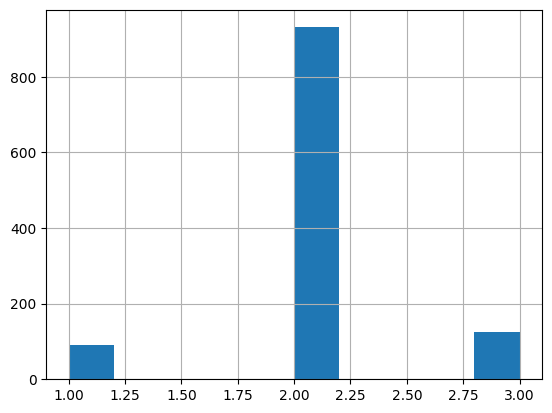

In [263]:
my["dstr"].hist()

<Axes: >

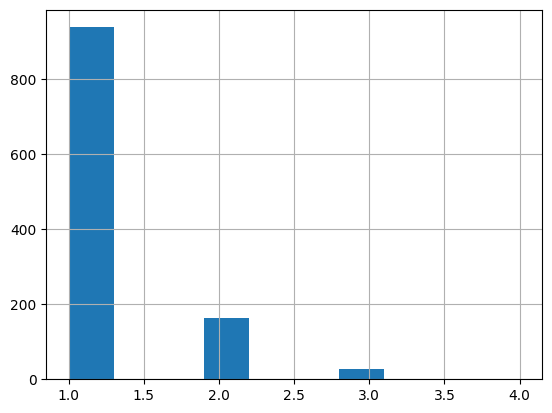

In [76]:
f["activity"].hist()

In [77]:
f.shape

(1130, 48)

In [78]:
my.shape

(2296, 49)

In [80]:
f["activity"].value_counts()

activity
1    938
2    163
3     28
4      1
Name: count, dtype: int64

In [81]:
[1018 + 938,
78 + 163,
60 + 28,
14 + 1,
11]

[1956, 241, 88, 15, 11]

In [86]:
m

{'peroxidase': 1,
 'oxidase': 2,
 'catalase': 3,
 'glutathione peroxidase': 4,
 'superoxide dismutase': 5,
 'phosphatase': 6,
 'laccase': 7,
 'esterase': 8,
 'hydrolase': 9,
 'reductase': 10,
 'antioxidant': 11,
 'rna splicing': 12,
 'dehydrogenase': 13,
 'phosphorylase': 14,
 'lipase': 15,
 'multiple antioxidant enzymes': 16,
 'phosphodiesterase': 17,
 'polymerase': 18,
 'dnase': 19,
 'rnase': 20,
 'protease': 21,
 'unknown': 22}

<Axes: >

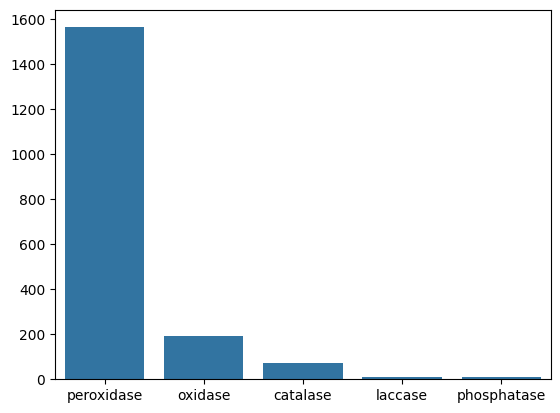

In [90]:
sns.barplot(y = np.array([1018 + 938,
78 + 163,
60 + 28,
14 + 1,
11])*0.8, x=["peroxidase", "oxidase", "catalase", "laccase", "phosphatase"])